<a href="https://colab.research.google.com/github/JuanParias29/BigDataProcessingProject/blob/main/Entrega_Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Procesamiento de Datos a Gran Escala

El siguiente proyecto analítico basado en la metodología CRISP-DM para el procesamiento de datos de gran escala, orientado a resolver preguntas de negocio en entornos educativos utilizando herramientas de Big Data.

## 🥷 **Colaboradores**
- **[Juan Pablo Arias](https://github.com/JuanParias29/Perfil_GitHub)**
- **[Paula Andrea Romero](https://github.com/Andyy870)**
- **[Juan Andrés Lopez](https://github.com/usuario)**   
- **[Kevin](https://github.com/usuario)**
- **[Juan José](https://github.com/usuario)**

---
## 📅**Curso**
**Procesamiento de Datos a Gran Escala**  
📍 *Pontificia Universidad Javeriana*  
👨‍🏫 *Docente:* [John Corredor, PhD](https://github.com/corredor-john)

# **Entendimiento del Negocio**

* **Desigualdad educativa en Colombia**  
En Colombia, la calidad educativa presenta notables diferencias entre las grandes ciudades como Bogotá y Medellín, y ciudades más pequeñas como Armenia y Neiva. Las ciudades más pequeñas, ubicadas en regiones con menores recursos y oferta académica, enfrentan desafíos significativos en comparación con las principales urbes del país.

* **Factores influyentes**  
Diversos factores, como el acceso a recursos educativos, la conectividad a Internet y el nivel socioeconómico de las familias, influyen en los resultados de la prueba ICFES 11, evidenciando la desigualdad educativa en distintas zonas del país.

* **Fuente de datos**  
El análisis de esta situación se basa en datos provenientes de fuentes oficiales y abiertas, como los datos abiertos de Colombia y el **DANE** (Departamento Administrativo Nacional de Estadística). Estos datos permiten realizar un análisis detallado y contrastante, proporcionando una representación objetiva de la situación educativa en diferentes regiones del país.

* **Indicadores macroeconómicos**  
Además de los datos educativos, se consideran indicadores macroeconómicos como el desempleo, la pobreza y la inversión pública para comprender mejor los desafíos educativos específicos de cada región.

---

# Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una fase clave en el análisis de datos que nos ayuda a comprender el comportamiento del conjunto de datos. Su objetivo es:

1. **Detectar datos atípicos**: Identificar valores que se desvían significativamente de la norma y decidir si se deben eliminar o investigar.

2. **Encontrar valores nulos**: Localizar datos faltantes para evaluar cómo afectan al análisis y decidir cómo manejarlos.

3. **Identificar patrones y tendencias**: Descubrir relaciones entre variables y comportamientos generales dentro del conjunto de datos.

4. **Revisar distribuciones**: Analizar la distribución de las variables para entender su comportamiento y detectar sesgos.

5. **Obtener estadísticas descriptivas**: Resumir las principales características de los datos, como la media, mediana y desviación estándar.

In [29]:
# Importar las librerias
import pandas as pd
import numpy as np
from pandas import DataFrame

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mticker

# Matemáticas, tiempo, manipulación
import math
import time
import os

# Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Ruta de los diccionarios de datos en Google Drive
file_path1 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Estadisticas_educacion_2016-2022.csv'
file_path3 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Inversion_municipal_Duque.csv'
file_path4 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Penetracion_internet_2016-2022.csv'
file_path5 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Indice_pobreza_2019-2022.csv'
file_path6 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_armenia.csv'
file_path7 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_bogota.csv'
file_path8 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_medellin.csv'
file_path9 = '/content/drive/MyDrive/PROCESAMIENTO_BIG_DATA/Resultados_Saber11_neiva.csv'

# Cargar el archivo desde Google Drive
educacion = pd.read_csv(file_path1)
inversion = pd.read_csv(file_path3)
internet = pd.read_csv(file_path4)
pobreza = pd.read_csv(file_path5)
icfes_armenia = pd.read_csv(file_path6)
icfes_bogota = pd.read_csv(file_path7)
icfes_medellin = pd.read_csv(file_path8)
icfes_neiva = pd.read_csv(file_path9)

<ipython-input-30-10584971d8e3>:15: DtypeWarning: Columns (0,1,25,26,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  pobreza = pd.read_csv(file_path5)
<ipython-input-30-10584971d8e3>:18: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  icfes_medellin = pd.read_csv(file_path8)


---
## **🛜 Internet por Municipio**

### 📚Descripción general del contenido de los conjuntos de datos
- Los conjuntos de datos incluyen información sobre el acceso a Internet fijo en Colombia, detallando el número de suscriptores con conexión dedicada por departamento y municipio, con reportes trimestrales desde 2015-4T hasta el último trimestre disponible. Además, presentan el porcentaje de penetración de Internet fijo, calculado con base en las proyecciones de población del DANE. También contienen datos sobre la Matrícula en Educación Superior, desagregados por nivel de formación y municipio, permitiendo el análisis de su distribución y evolución en el país.

In [31]:
# Mostrar las primeras filas del dataset
display(internet.head())

# Mostrar la cantidad de filas y columnas
print("El tamaño del Datframe es:" ,internet.shape)

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2016,1,5,ANTIOQUIA,5059,ARMENIA,233,5212,"4,47"
1,2020,1,63,QUINDÍO,63001,ARMENIA,77271,302613,"25,53"
2,2019,3,5,ANTIOQUIA,5059,ARMENIA,115,5085,"2,26"
3,2016,3,5,ANTIOQUIA,5059,ARMENIA,398,5212,"7,64"
4,2022,2,5,ANTIOQUIA,5059,ARMENIA,779,5314,"14,66"


El tamaño del Datframe es: (140, 9)


### **📌 Compresión de los Atributos del Dataset**

## 📅 Datos Generales
- **AÑO** (`a_o`): Representa el año en el que se registraron los datos.  
- **TRIMESTRE** (`trimestre`): Indica el trimestre del año correspondiente a la información recolectada.  

## 🗺️ Ubicación Geográfica
- **COD_DEPARTAMENTO** (`cod_departamento`): Código único que identifica el departamento según la clasificación oficial.  
- **DEPARTAMENTO** (`departamento`): Nombre del departamento donde se registraron los datos.  
- **COD_MUNICIPIO** (`cod_municipio`): Código único asignado a cada municipio.  
- **MUNICIPIO** (`municipio`): Nombre del municipio al que corresponden los datos.  

## 🌐 Conectividad a Internet
- **No. ACCESOS FIJOS A INTERNET** (`no_accesos_fijos_a_internet`): Cantidad de accesos fijos a internet registrados en el municipio.  
- **POBLACIÓN DANE** (`poblaci_n_dane`): Número total de habitantes en el municipio según los datos del DANE.  
- **INDICE** (`indice`): Métrica que refleja el nivel de penetración de internet fijo en el municipio, calculada con base en la población y el número de accesos.  

### **🔢 Tipos de Datos 🔠**

In [32]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(internet.dtypes)

Las variables del dataset son: 

AÑO                              int64
TRIMESTRE                        int64
COD_DEPARTAMENTO                 int64
DEPARTAMENTO                    object
COD_MUNICIPIO                    int64
MUNICIPIO                       object
No. ACCESOS FIJOS A INTERNET     int64
POBLACIÓN DANE                   int64
INDICE                          object
dtype: object


### **📊 Analisis Estadístico y Gráficos**

###**Estadísticas** **generales**

In [33]:
# Obtener estadísticas generales de las columnas númericas
estadisticas = internet.describe()

# Mostrar estadísticas
print(estadisticas)


               AÑO   TRIMESTRE  COD_DEPARTAMENTO  COD_MUNICIPIO  \
count   140.000000  140.000000        140.000000     140.000000   
mean   2019.000000    2.500000         25.000000   25012.600000   
std       2.007181    1.122048         23.304058   23294.040883   
min    2016.000000    1.000000          5.000000    5001.000000   
25%    2017.000000    1.750000          5.000000    5059.000000   
50%    2019.000000    2.500000         11.000000   11001.000000   
75%    2021.000000    3.250000         41.000000   41001.000000   
max    2022.000000    4.000000         63.000000   63001.000000   

       No. ACCESOS FIJOS A INTERNET  POBLACIÓN DANE  
count                  1.400000e+02    1.400000e+02  
mean                   5.553707e+05    2.143486e+06  
std                    7.607291e+05    2.869796e+06  
min                    1.090000e+02    5.085000e+03  
25%                    6.669925e+04    2.916980e+05  
50%                    8.942650e+04    3.610490e+05  
75%               

In [34]:
#Valores nulos
internet.isnull().sum()

,0
AÑO,0
TRIMESTRE,0
COD_DEPARTAMENTO,0
DEPARTAMENTO,0
COD_MUNICIPIO,0
MUNICIPIO,0
No. ACCESOS FIJOS A INTERNET,0
POBLACIÓN DANE,0
INDICE,0


In [35]:
#Valores únicos
internet.nunique()

,0
AÑO,7
TRIMESTRE,4
COD_DEPARTAMENTO,4
DEPARTAMENTO,4
COD_MUNICIPIO,5
MUNICIPIO,4
No. ACCESOS FIJOS A INTERNET,139
POBLACIÓN DANE,35
INDICE,133


In [36]:
# Contar registros duplicados en todo el dataset
duplicados = internet.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


In [37]:
internet['No. ACCESOS FIJOS A INTERNET'].max()


2638171

In [38]:
internet['No. ACCESOS FIJOS A INTERNET'].min()

109

###**Gráficas**

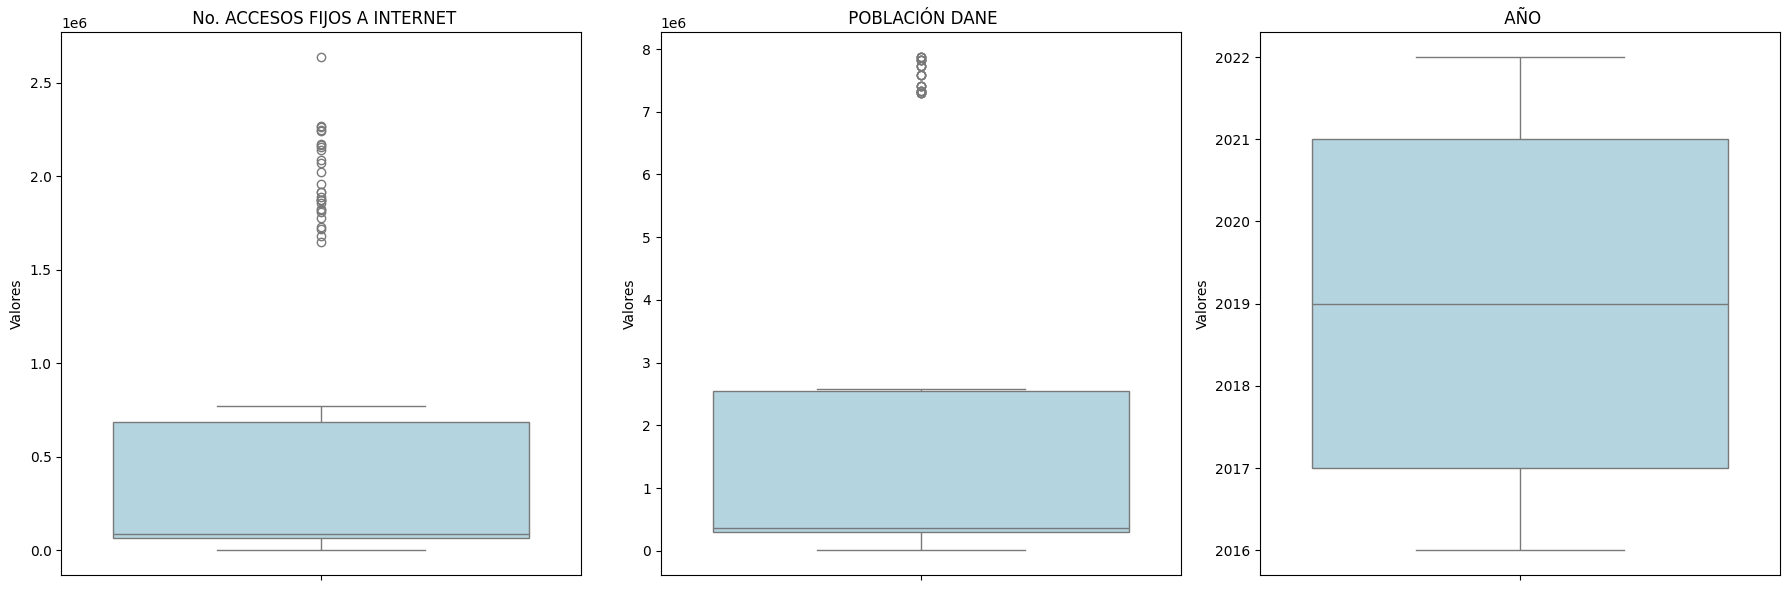

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el dataset (ajusta según sea necesario)
# df = pd.read_csv("archivo.csv")

# Seleccionar las variables numéricas relevantes
variables_relevantes = [
    "No. ACCESOS FIJOS A INTERNET",
    "POBLACIÓN DANE",
    "AÑO"
]

# Filtrar solo las columnas numéricas relevantes y eliminar valores nulos
df_numeric = internet[variables_relevantes].dropna()

# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_relevantes), figsize=(18, 6))

# Generar boxplots para cada variable
for i, col in enumerate(variables_relevantes):
    sns.boxplot(y=df_numeric[col], ax=axes[i], color="lightblue")
    axes[i].set_title(f' {col}')
    axes[i].set_ylabel("Valores")

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

El análisis de los boxplots muestra que tanto los accesos fijos a internet como la población municipal tienen distribuciones sesgadas con valores atípicos altos, indicando que unos pocos municipios concentran gran parte de la conectividad y la población. La mayoría de los municipios tienen bajos accesos a internet en relación con su población. En contraste, la variable AÑO está uniformemente distribuida entre 2016 y 2022, sin valores extremos. Esto sugiere una cobertura de datos consistente en el tiempo, mientras que la conectividad muestra desigualdades significativas entre municipios.

<ipython-input-40-5dd4328e0731>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=internet_sorted, x="MUNICIPIO", y="No. ACCESOS FIJOS A INTERNET", palette="Blues_r")


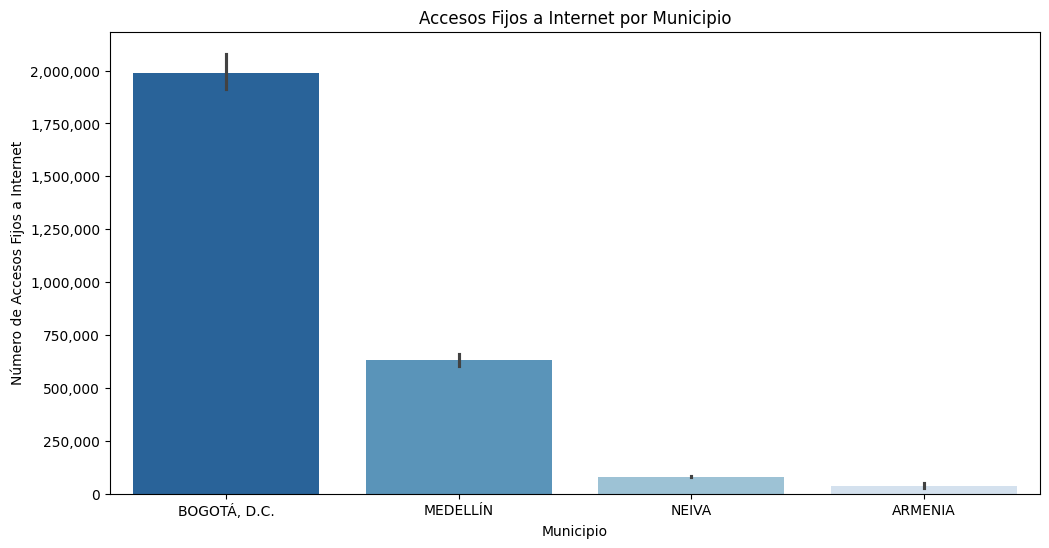

In [40]:
#Número de Accesos fijos a internet por Municipio

internet_sorted = internet.sort_values(by="No. ACCESOS FIJOS A INTERNET", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=internet_sorted, x="MUNICIPIO", y="No. ACCESOS FIJOS A INTERNET", palette="Blues_r")
plt.xlabel("Municipio")
plt.ylabel("Número de Accesos Fijos a Internet")
plt.title("Accesos Fijos a Internet por Municipio")
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))# eje Y en miles
plt.show()


La gráfica muestra el número de accesos fijos a internet en distintos municipios, destacando una fuerte concentración en Bogotá, D.C., seguido por Medellín, mientras que Neiva y Armenia tienen valores significativamente más bajos. Esta distribución es esperada debido a la relación positiva entre la población y el acceso a internet, como se observó en la matriz de correlación. Bogotá, al ser la ciudad más grande del país, lidera en cantidad de accesos, mientras que Medellín, otro centro urbano importante, ocupa el segundo lugar.

<ipython-input-41-c7213a969c9f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=poblacion_sorted, x="MUNICIPIO", y="POBLACIÓN DANE", palette="viridis")


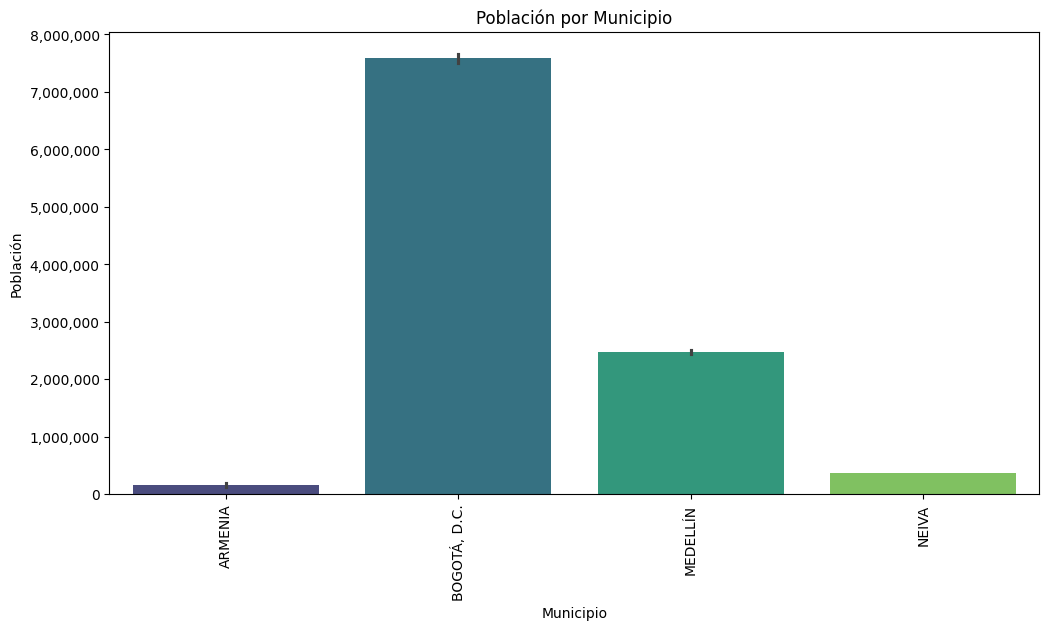

In [41]:
#Población por municipios
poblacion_sorted = internet.copy()
plt.figure(figsize=(12, 6))
sns.barplot(data=poblacion_sorted, x="MUNICIPIO", y="POBLACIÓN DANE", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Municipio")
plt.ylabel("Población")
plt.title("Población por Municipio")
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


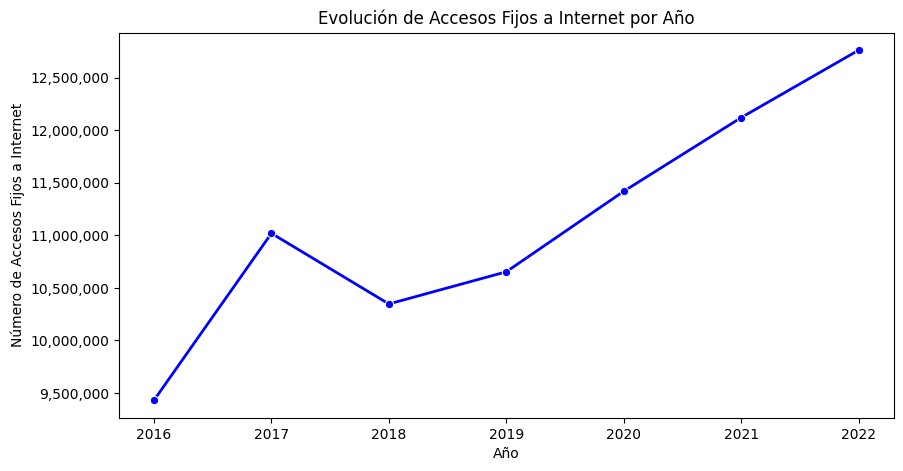

In [42]:
#El incremento del acceso a internet a traves de los años

internet_por_año = internet.groupby("AÑO")["No. ACCESOS FIJOS A INTERNET"].sum().reset_index() #suma total de accesos de todos los municipios.
plt.figure(figsize=(10, 5))
sns.lineplot(data=internet_por_año, x="AÑO", y="No. ACCESOS FIJOS A INTERNET", marker="o", linewidth=2, color="b")
plt.xlabel("Año")
plt.ylabel("Número de Accesos Fijos a Internet")
plt.title("Evolución de Accesos Fijos a Internet por Año")
plt.ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


La gráfica muestra la evolución del número de accesos fijos a internet entre los años 2016 y 2022. Se observa una tendencia general al alza, con un crecimiento significativo desde 2016 hasta 2017, seguido de una leve disminución en 2018. A partir de 2019, la cantidad de accesos vuelve a aumentar de manera sostenida, alcanzando su punto más alto en 2022.

En general, la gráfica sugiere que la disponibilidad de internet está fuertemente ligada al tamaño de la población, mientras que otros factores tienen menor impacto en la variabilidad de los accesos.

---
## **Educación por Municipio**

### 📚Descripción general del contenido de los conjuntos de datos  }
- Los conjuntos de datos contienen información estadística sobre educación en los niveles preescolar, básica y media en municipios de Colombia, desde 2011 hasta 2023, excluyendo valores atípicos. Incluyen indicadores sectoriales clave, como tasas de cobertura bruta y neta, calculadas con proyecciones del Censo 2018 para 2018 y 2019. Los valores están en formato decimal en la base de datos, pero se exportan multiplicados por 100 para expresarlos como porcentajes.

In [45]:
# Mostrar las primeras filas del dataset
display(educacion.head())

# Mostrar la cantidad de filas y columnas
educacion.shape

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2022,41001,Neiva,41,Huila,3791.000,Neiva,72715.000,93.76,93.50,...,10.43,0.13,8.38,15.68,8.81,9.61,0.36,8.41,14.46,5.11
1,2022,5001,Medellín,5,Antioquia,3759.000,Medellín,378768.000,97.26,97.06,...,9.43,0.18,6.54,15.24,7.49,6.41,0.17,5.63,9.41,4.02
2,2022,63001,Armenia,63,Quindio,3804.000,Armenia,42792.000,96.02,95.94,...,6.50,0.04,4.19,10.65,6.26,4.43,0.00,3.54,7.25,2.46
3,2022,5059,Armenia,5,Antioquia,3758.000,Antioquia (ETC),796.000,56.53,56.53,...,13.73,0.00,4.23,28.65,7.46,4.07,0.00,4.21,5.62,1.49
4,2021,63001,Armenia,63,Quindio,3.804,Armenia,43.096,95.36,95.30,...,5.87,0.12,3.84,9.00,6.09,3.74,0.21,2.31,6.46,2.43


(29, 41)

### **📌 Compresión de los Atributos del Dataset**
## 📅 Datos Generales
- **AÑO** (`a_o`): Representa el año en el que se registraron los datos.
- **CÓDIGO_MUNICIPIO** (`c_digo_municipio`): Código DANE del municipio.
- **MUNICIPIO** (`municipio`): Nombre del municipio.
- **CÓDIGO_DEPARTAMENTO** (`c_digo_departamento`): Código DANE del departamento.
- **DEPARTAMENTO** (`departamento`): Nombre del departamento.
- **CÓDIGO_ETC** (`c_digo_etc`): Código DANE de la ETC.
- **ETC** (`etc`): Nombre de la ETC.

## 🌍 Demografía Educativa
- **POBLACIÓN_5_16** (`poblaci_n_5_16`): Población en edad teórica de estudiar (5 a 16 años) según proyecciones del DANE.
- **TASA_MATRICULACIÓN_5_16** (`tasa_matriculaci_n_5_16`): Proporción de la población entre 5 y 16 años que asiste al sistema educativo. Puede ser mayor al 100% por flujos migratorios.

## 📊 Cobertura Educativa
- **COBERTURA_NETA** (`cobertura_neta`): Relación entre estudiantes matriculados en transición, primaria, secundaria y media con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_TRANSICIÓN** (`cobertura_neta_transici_n`): Relación entre estudiantes matriculados en transición con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_PRIMARIA** (`cobertura_neta_primaria`): Relación entre estudiantes matriculados en primaria con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_SECUNDARIA** (`cobertura_neta_secundaria`): Relación entre estudiantes matriculados en secundaria con edad teórica y la población total correspondiente.
- **COBERTURA_NETA_MEDIA** (`cobertura_neta_media`): Relación entre estudiantes matriculados en media con edad teórica y la población total correspondiente.
- **COBERTURA_BRUTA** (`cobertura_bruta`): Relación entre estudiantes matriculados en transición, primaria, secundaria y media y la población en edad teórica para estos niveles.

## 🏫 Calidad y Infraestructura Educativa
- **TAMAÑO_PROMEDIO_DE_GRUPO** (`tama_o_promedio_de_grupo`): Número promedio de estudiantes por grupo considerando el sector oficial y no oficial.
- **SEDES_CONECTADAS_A_INTERNET** (`sedes_conectadas_a_internet`): Porcentaje de sedes oficiales de una Entidad Territorial Certificada conectadas a internet.

## 📉 Indicadores de Desempeño Académico
- **DESERCIÓN** (`deserci_n`): Tasa de deserción intraanual del sector oficial, indica alumnos que abandonan estudios durante el año.
- **APROBACIÓN** (`aprobaci_n`): Tasa de aprobación de estudiantes del sector oficial en educación preescolar, básica y media.
- **REPROBACIÓN** (`reprobaci_n`): Tasa de reprobación de estudiantes del sector oficial en educación preescolar, básica y media.
- **REPITENCIA** (`repitencia`): Tasa de repitencia del sector oficial, porcentaje de alumnos que repiten grado del año anterior.

### **🔢 Tipos de Datos 🔠**

In [46]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(educacion.dtypes)

Las variables del dataset son: 

AÑO                              int64
CÓDIGO_MUNICIPIO                 int64
MUNICIPIO                       object
CÓDIGO_DEPARTAMENTO              int64
DEPARTAMENTO                    object
CÓDIGO_ETC                     float64
ETC                             object
POBLACIÓN_5_16                 float64
TASA_MATRICULACIÓN_5_16        float64
COBERTURA_NETA                 float64
COBERTURA_NETA_TRANSICIÓN      float64
COBERTURA_NETA_PRIMARIA        float64
COBERTURA_NETA_SECUNDARIA      float64
COBERTURA_NETA_MEDIA           float64
COBERTURA_BRUTA                float64
COBERTURA_BRUTA_TRANSICIÓN     float64
COBERTURA_BRUTA_PRIMARIA       float64
COBERTURA_BRUTA_SECUNDARIA     float64
COBERTURA_BRUTA_MEDIA          float64
TAMAÑO_PROMEDIO_DE_GRUPO       float64
SEDES_CONECTADAS_A_INTERNET    float64
DESERCIÓN                      float64
DESERCIÓN_TRANSICIÓN           float64
DESERCIÓN_PRIMARIA             float64
DESERCIÓN_SECUNDARIA           

### **📊 Analisis Estadístico y Gráficos**

###**Estadísticas** **generales**

In [47]:
# Obtener estadísticas generales de las columnas númericas
educacion.describe()

,AÑO,CÓDIGO_MUNICIPIO,CÓDIGO_DEPARTAMENTO,CÓDIGO_ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2019.034483,27911.551724,27.896552,3257.003862,1.434836e+05,87.556897,87.805172,65.485172,84.261379,77.078966,...,8.350345,0.378621,6.065517,13.121034,6.672414,4.910000,0.395862,4.328966,7.306207,2.335862
std,2.008602,24952.895279,24.966184,1324.455610,2.464516e+05,15.979047,15.429208,16.457131,17.054172,15.537550,...,2.794990,0.453752,2.440342,5.192261,2.979378,2.929042,0.560864,2.859940,4.318385,1.509949
min,2016.000000,5001.000000,5.000000,3.758000,4.309600e+01,56.530000,56.530000,28.790000,46.850000,47.460000,...,1.570000,0.000000,0.870000,3.140000,0.000000,0.740000,0.000000,0.530000,1.080000,0.000000
25%,2017.000000,5059.000000,5.000000,3758.000000,8.360000e+02,78.730000,80.080000,50.000000,73.100000,75.770000,...,6.500000,0.120000,4.230000,9.320000,6.260000,3.300000,0.040000,2.670000,4.880000,1.290000
50%,2019.000000,11001.000000,11.000000,3759.000000,5.442100e+04,96.020000,95.890000,73.140000,93.330000,83.140000,...,8.680000,0.200000,6.160000,13.230000,7.330000,4.400000,0.190000,3.610000,6.460000,2.090000
75%,2021.000000,41001.000000,41.000000,3791.000000,7.271500e+04,98.150000,97.110000,78.010000,94.580000,88.930000,...,10.540000,0.470000,8.410000,16.180000,8.550000,6.460000,0.360000,5.630000,9.740000,3.510000
max,2022.000000,63001.000000,63.000000,3804.000000,1.181597e+06,103.400000,103.180000,84.860000,101.710000,90.330000,...,13.730000,1.850000,10.570000,28.650000,12.500000,10.840000,2.500000,11.180000,15.320000,5.110000


In [48]:
#Valores nulos
educacion.isnull().sum()

,0
AÑO,0
CÓDIGO_MUNICIPIO,0
MUNICIPIO,0
CÓDIGO_DEPARTAMENTO,0
DEPARTAMENTO,0
CÓDIGO_ETC,0
ETC,0
POBLACIÓN_5_16,0
TASA_MATRICULACIÓN_5_16,0
COBERTURA_NETA,0


In [49]:
#Valores únicos
educacion.nunique()

,0
AÑO,7
CÓDIGO_MUNICIPIO,5
MUNICIPIO,4
CÓDIGO_DEPARTAMENTO,4
DEPARTAMENTO,4
CÓDIGO_ETC,9
ETC,5
POBLACIÓN_5_16,29
TASA_MATRICULACIÓN_5_16,29
COBERTURA_NETA,29


In [50]:
# Contar registros duplicados en todo el dataset
duplicados = educacion.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


###**Gráficas**

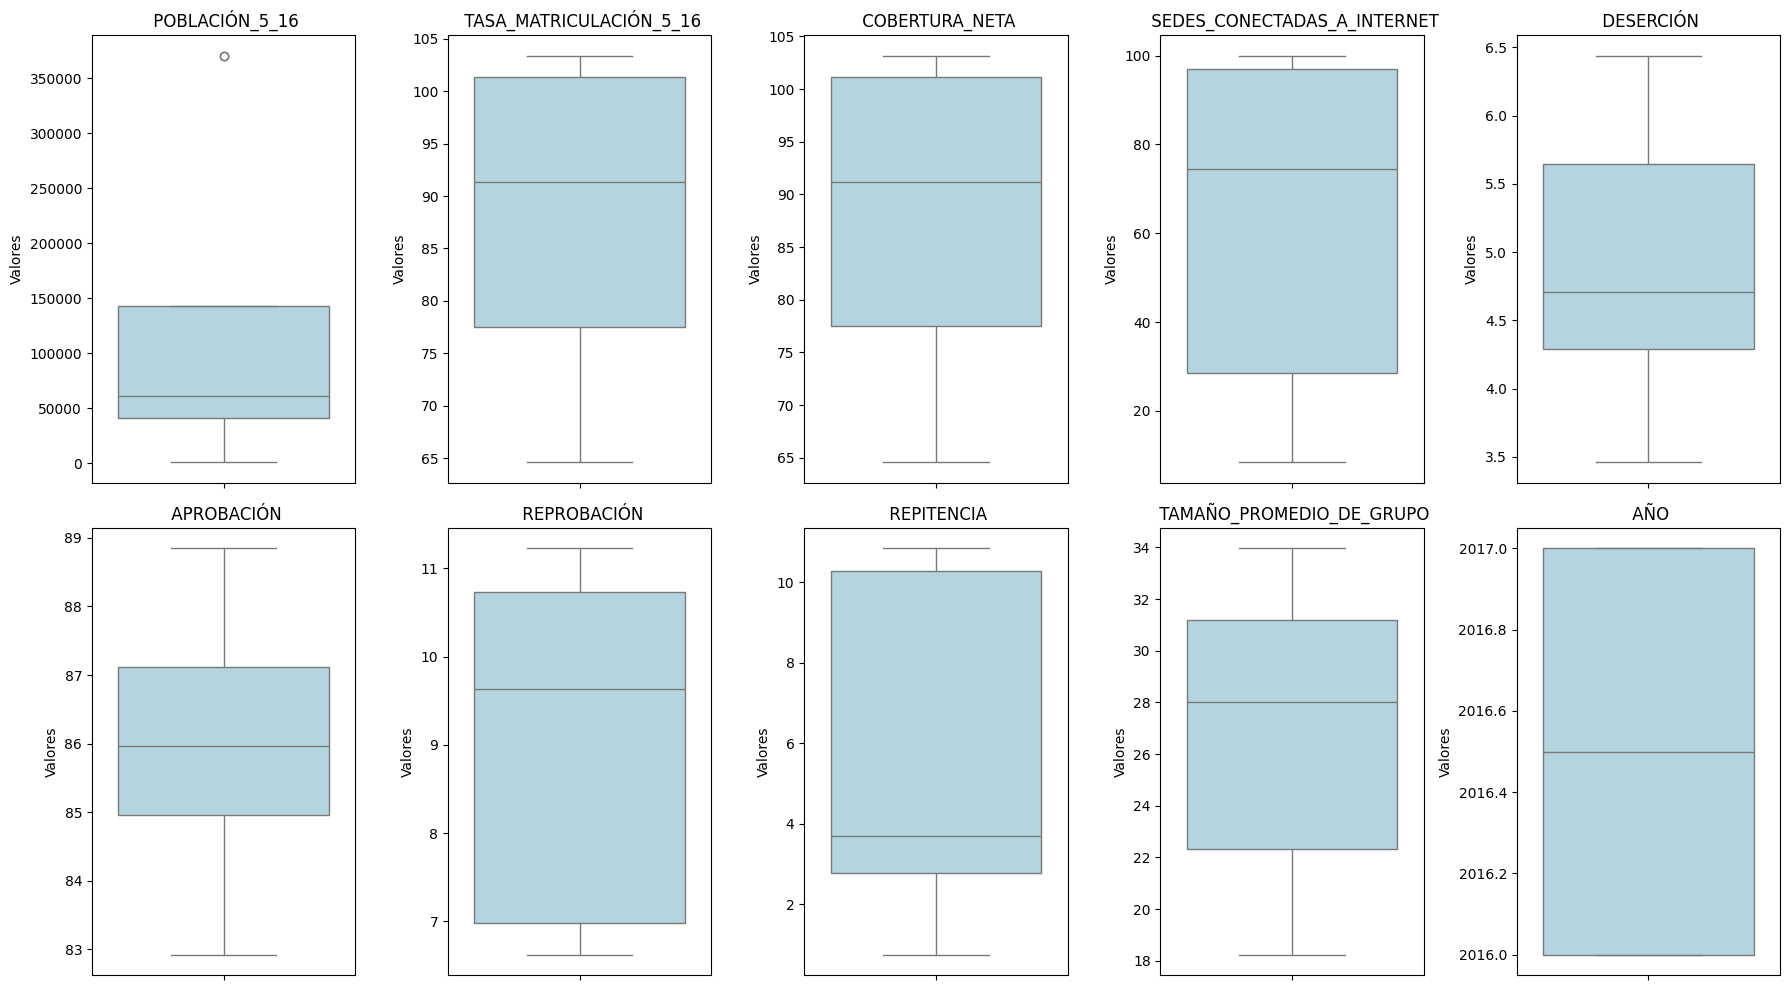

In [51]:

# Seleccionar las variables numéricas más relevantes
variables_relevantes = [
    'POBLACIÓN_5_16', 'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
    'APROBACIÓN', 'REPROBACIÓN', 'REPITENCIA','TAMAÑO_PROMEDIO_DE_GRUPO','AÑO'
]

# Filtrar solo las columnas numéricas relevantes
df_numeric = educacion[variables_relevantes].dropna()

# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Generar un boxplot por variable numérica
for i, col in enumerate(variables_relevantes):
    sns.boxplot(y=df_numeric[col], ax=axes[i], color="lightblue")
    axes[i].set_title(f' {col}')
    axes[i].set_ylabel("Valores")

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


El gráfico muestra la distribución de diversas variables educativas mediante diagramas de caja. Se observa que la población entre 5 y 16 años varía significativamente entre regiones, con algunos valores atípicos elevados. La tasa de matriculación y cobertura neta son altas, pero presentan variabilidad en ciertas áreas. La conectividad a internet en sedes educativas es desigual, con una mediana en torno al 50%. La deserción se mantiene en niveles bajos (3.5%-6.5%), mientras que la aprobación ronda el 86%, aunque con tasas de reprobación y repitencia moderadas en algunas regiones.

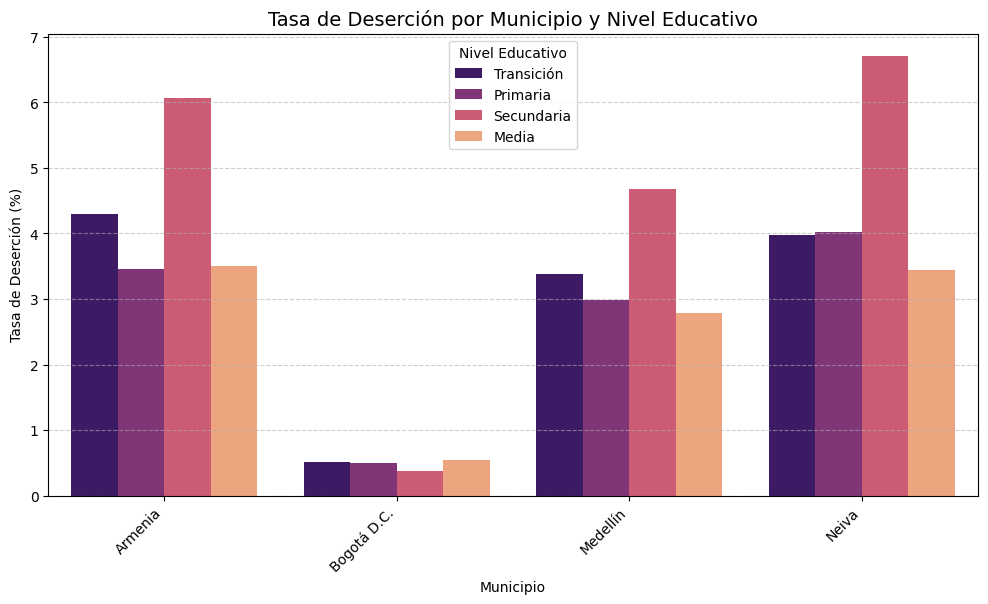

In [52]:
#Deserción por Municipio


desercion_cols = ["DESERCIÓN_TRANSICIÓN", "DESERCIÓN_PRIMARIA", "DESERCIÓN_SECUNDARIA", "DESERCIÓN_MEDIA"]
df_desercion = educacion.groupby("MUNICIPIO")[desercion_cols].mean().reset_index()
df_melted = df_desercion.melt(id_vars=["MUNICIPIO"],
                              var_name="Nivel Educativo",
                              value_name="Tasa de Deserción")

df_melted["Nivel Educativo"] = df_melted["Nivel Educativo"].replace({
    "DESERCIÓN_TRANSICIÓN": "Transición",
    "DESERCIÓN_PRIMARIA": "Primaria",
    "DESERCIÓN_SECUNDARIA": "Secundaria",
    "DESERCIÓN_MEDIA": "Media"
})

# Filtrar solo los municipios con mayor tasa de deserción promedio
top_municipios = df_desercion.set_index("MUNICIPIO").mean(axis=1).nlargest(10).index
df_melted_top = df_melted[df_melted["MUNICIPIO"].isin(top_municipios)]


plt.figure(figsize=(12,6))
sns.barplot(data=df_melted_top, x="MUNICIPIO", y="Tasa de Deserción", hue="Nivel Educativo", palette="magma")
plt.title("Tasa de Deserción por Municipio y Nivel Educativo", fontsize=14)
plt.xlabel("Municipio")
plt.ylabel("Tasa de Deserción (%)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Nivel Educativo")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


El gráfico muestra la tasa de deserción escolar por municipio y nivel educativo. Se observa que Neiva y Armenia tienen los valores más altos, especialmente en secundaria, con tasas que superan el 6%. Medellín presenta tasas intermedias, con un pico en secundaria, mientras que Bogotá D.C. tiene la deserción más baja en todos los niveles, con valores cercanos al 1%. En general, la secundaria es el nivel con mayor deserción en la mayoría de los municipios, mientras que la transición y la educación media presentan tasas más moderadas.

<Figure size 1000x600 with 0 Axes>

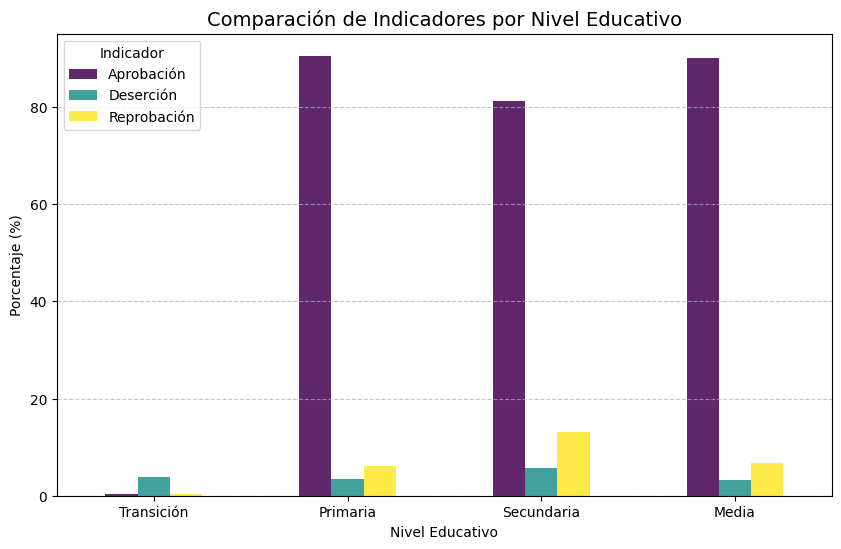

In [53]:
#Indicadores por nivel educativo

indicadores = {
    "Aprobación": ["APROBACIÓN_TRANSICIÓN", "APROBACIÓN_PRIMARIA", "APROBACIÓN_SECUNDARIA", "APROBACIÓN_MEDIA"],
    "Deserción": ["DESERCIÓN_TRANSICIÓN", "DESERCIÓN_PRIMARIA", "DESERCIÓN_SECUNDARIA", "DESERCIÓN_MEDIA"],
    "Reprobación": ["REPROBACIÓN_TRANSICIÓN", "REPROBACIÓN_PRIMARIA", "REPROBACIÓN_SECUNDARIA", "REPROBACIÓN_MEDIA"]
}

# Crear un DataFrame con los promedios de cada indicador
data = {indicador: [educacion[col].mean() for col in columnas] for indicador, columnas in indicadores.items()}
niveles_educativos = ["Transición", "Primaria", "Secundaria", "Media"]

# Crear el gráfico
plt.figure(figsize=(10,6))
df_plot = pd.DataFrame(data, index=niveles_educativos)
df_plot.plot(kind="bar", figsize=(10,6), colormap="viridis", alpha=0.85)

# Personalización del gráfico
plt.title("Comparación de Indicadores por Nivel Educativo", fontsize=14)
plt.xlabel("Nivel Educativo")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.legend(title="Indicador")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



El gráfico muestra que la aprobación es el indicador predominante en todos los niveles educativos, con valores superiores al 80%, aunque disminuye ligeramente en secundaria. La deserción se mantiene baja y sin variaciones significativas. La reprobación, en cambio, es más baja en transición y primaria, aumenta notablemente en secundaria y disminuye nuevamente en media. Esto sugiere que la secundaria es la etapa con mayores desafíos académicos para los estudiantes.

<ipython-input-54-6d225aafc514>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels())  # Rotar nombres de municipios


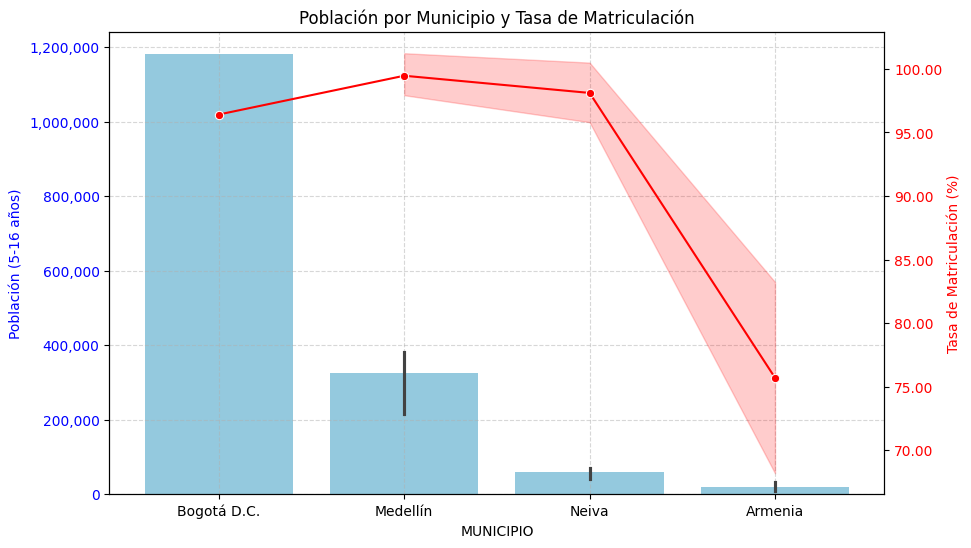

In [54]:
#Población por municipio y tasa de matriculación

df_sorted = educacion.sort_values("POBLACIÓN_5_16", ascending=False)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para la población
sns.barplot(x="MUNICIPIO", y="POBLACIÓN_5_16", data=df_sorted, color="skyblue", ax=ax1)
ax1.set_ylabel("Población (5-16 años)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xticklabels(ax1.get_xticklabels())  # Rotar nombres de municipios

# Quitar notación científica del eje Y
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Crear segundo eje Y para la tasa de matriculación
ax2 = ax1.twinx()
sns.lineplot(x="MUNICIPIO", y="TASA_MATRICULACIÓN_5_16", data=df_sorted, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Tasa de Matriculación (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Quitar notación científica del eje Y secundario
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}"))

# Título y grid
plt.title("Población por Municipio y Tasa de Matriculación")
ax1.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()



El gráfico muestra la población de niños y adolescentes entre 5 y 16 años por municipio (barras azules, eje izquierdo) y la tasa de matriculación correspondiente (línea roja, eje derecho). Bogotá D.C. tiene la población más alta, superando 1.2 millones, y una tasa de matriculación cercana al 100%. Medellín, con una población significativamente menor, también mantiene una tasa alta. Neiva, a pesar de tener una población mucho menor que Bogotá, presenta una tasa de matriculación ligeramente superior, lo que sugiere una mayor cobertura proporcional en el sistema educativo. En contraste, Armenia tiene la población más baja y la menor tasa de matriculación, cercana al 75%.

---
## **Índice de Pobreza de Hogares por Persona**

### 📚Descripción general del contenido de los conjuntos de datos
- Los conjuntos de datos contienen información detallada sobre diversos aspectos sociodemográficos, educativos, laborales y de salud de la población en Colombia. Incluyen variables clave como **identificadores únicos** (directorio, secuencia de encuesta, orden), características personales (**edad, alfabetización, nivel educativo alcanzado, matrícula actual**), condiciones de salud (**afiliación a seguridad social, acceso a servicios médicos, alimentación escolar**), y aspectos laborales (**ocupación principal, búsqueda de empleo, cotización a pensiones**). Esta información permite realizar análisis sobre la cobertura educativa, acceso a servicios de salud, condiciones laborales y bienestar social, facilitando la toma de decisiones y la formulación de políticas públicas.

In [55]:
# Mostrar las primeras filas del dataset
display(pobreza.head())

# Mostrar la cantidad de filas y columnas
pobreza.shape

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,P6020,P6040,P6051,FEX_C,P6090,P5665,...,P6270,P6351,P6390,P7250,P6920,P3336S1,P3336S2,P3336S3,P3337,P1082S2;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,7787900,1,1.0,1.0,2.0,37.0,1.0,143.618606,1.0,2.0,...,NaN,NaN,COMERCIO DE PRODUCTOS ALIMENTICIOS ASEO,NaN,2.0,NaN,NaN,NaN,NaN,1;;;;;;;;;;;;;;;;;;;;;;;;;;;;
1,7787900,2,1.0,2.0,2.0,13.0,3.0,143.618606,1.0,2.0,...,2.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;
2,7787900,3,1.0,3.0,2.0,5.0,3.0,143.618606,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;
3,7787900,4,1.0,4.0,1.0,73.0,5.0,143.618606,1.0,2.0,...,NaN,NaN,SERVICIOS VENTA DE JUEGOS DE AZAR GIROS RECARGAS,NaN,2.0,NaN,NaN,NaN,NaN,1;;;;;;;;;;;;;;;;;;;;;;;;;;;;
4,7787901,1,1.0,1.0,1.0,55.0,1.0,273.731538,1.0,2.0,...,NaN,NaN,COMPRA Y VENTA DE FRUTAS,NaN,2.0,NaN,NaN,NaN,NaN,1;;;;;;;;;;;;;;;;;;;;;;;;;;;;


(968426, 34)

### **📌 Compresión de los Atributos del Dataset**
## 📂 Identificación y Secuencia
- **DIRECTORIO** (`directorio`): Identificador del directorio de la encuesta.  
- **SECUENCIA_ENCUESTA** (`secuencia_encuesta`): Número de secuencia de la encuesta.  
- **SECUENCIA_P** (`secuencia_p`): Número de secuencia de la persona dentro del hogar.  
- **ORDEN** (`orden`): Orden de la persona en la encuesta.  

## 👤 Información Demográfica
- **P6020** (`P6020`): Género de la persona.  
- **P6040** (`P6040`): ¿Cuántos años cumplidos tiene?  
- **FEX_C** (`fex_c`): Factor de expansión de la encuesta.  

## 🏥 Salud
- **P6051** (`P6051`): Estado de salud general.  
- **P6090** (`P6090`): ¿Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud? (EPS o ARS - Sisben).  
- **P5665** (`P5665`): En los últimos 30 días, ¿tuvo alguna enfermedad, accidente, problema odontológico u otro problema de salud que no haya implicado hospitalización?  
- **P8563** (`P8563`): Para tratar ese problema de salud, ¿qué hizo principalmente?  

## 🏠 Condiciones de Vida
- **P51** (`P51`): ¿Dónde o con quién permanece la mayor parte del tiempo entre semana?  
- **P55** (`P55`): ¿Recibe o toma desayuno o almuerzo en el lugar donde permanece la mayor parte del tiempo entre semana?  
- **P774** (`P774`): ¿Quién paga por esta alimentación?  

## 📖 Educación
- **P6160** (`P6160`): ¿Sabe leer y escribir?  
- **P8586** (`P8586`): ¿Actualmente estudia? (Asiste al preescolar, escuela, colegio o universidad).  
- **P8587** (`P8587`): ¿Cuál es el nivel educativo más alto alcanzado y el último año o grado aprobado en este nivel?  
- **P8587S1** (`P8587S1`): Grado o año aprobado.  
- **P1088** (`P1088`): ¿En qué nivel está matriculado y qué grado cursa?  
- **P1088S1** (`P1088S1`): Grado o año que cursa.  
- **P6180** (`P6180`): ¿Recibe en el plantel educativo alimentos en forma gratuita o por un pago simbólico?  

## 💼 Ocupación y Trabajo
- **P6240** (`P6240`): ¿En qué actividad ocupó la mayor parte del tiempo la semana pasada?  
- **P6250** (`P6250`): Además de lo anterior, ¿realizó alguna actividad paga por una hora o más?  
- **P6260** (`P6260`): Aunque no trabajó la semana pasada por una hora o más en forma remunerada, ¿tenía algún trabajo o negocio por el que recibe ingresos?  
- **P6270** (`P6270`): ¿Trabajó la semana pasada en un negocio por una hora o más sin que le pagaran?  
- **P6351** (`P6351`): Si le hubiera resultado algún trabajo, ¿estaba disponible la semana pasada para empezar a trabajar?  
- **P6390S1** (`P6390S1`): ¿A qué actividad se dedica principalmente la empresa o negocio en la que realiza su trabajo?  
- **P7250** (`P7250`): ¿Durante cuántas semanas ha estado buscando trabajo?  
- **P6920** (`P6920`): ¿Está cotizando actualmente a un fondo de pensiones?

### **🔢 Tipos de Datos 🔠**

In [56]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(pobreza.dtypes)

Las variables del dataset son: 

DIRECTORIO                              object
SECUENCIA_ENCUESTA                      object
SECUENCIA_P                            float64
ORDEN                                  float64
P6020                                  float64
P6040                                  float64
P6051                                  float64
FEX_C                                  float64
P6090                                  float64
P5665                                  float64
P8563                                  float64
P51                                    float64
P55                                    float64
P774                                   float64
P6160                                  float64
P8586                                  float64
P8587                                  float64
P8587S1                                float64
P1088                                  float64
P1088S1                                float64
P6180                      

### **📊 Analisis Estadístico y Gráficos**

###**Estadísticas** **generales**

In [57]:
# Obtener estadísticas generales de las columnas númericas
pobreza.describe()

,SECUENCIA_P,ORDEN,P6020,P6040,P6051,FEX_C,P6090,P5665,P8563,P51,...,P6180,P6240,P6250,P6260,P6270,P7250,P6920,P3336S1,P3336S2,P3337
count,462884.000000,462884.000000,462884.000000,462884.000000,462884.000000,462884.000000,462884.000000,235576.000000,22773.000000,32386.000000,...,244678.000000,284930.000000,184614.000000,175921.000000,94024.000000,185702.000000,230646.000000,110028.000000,110028.000000,46790.000000
mean,1.006645,2.352684,1.518026,34.229338,110.527333,111.004835,1.527741,1.984391,2.221490,1.534058,...,2.286707,2.295708,1.952913,1.985340,1.901578,2.457259,1.792041,1.395817,1.899480,1.459692
std,0.095409,1.447916,0.499675,22.087848,249.319971,267.063355,0.594064,0.417792,1.532063,0.941010,...,1.396635,1.258575,0.211826,0.120188,0.297886,6.976564,0.463361,0.489028,0.300693,0.498378
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,15.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,1.000000,2.000000,2.000000,32.000000,8.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,3.000000,2.000000,51.000000,124.242339,118.998360,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,6.000000,29.000000,2.000000,112.000000,3622.134646,7131.098451,9.000000,8.000000,8.000000,8.000000,...,6.000000,6.000000,2.000000,2.000000,2.000000,520.000000,3.000000,2.000000,2.000000,2.000000


In [58]:
#Valores nulos
pobreza.isnull().sum()

,0
DIRECTORIO,0
SECUENCIA_ENCUESTA,0
SECUENCIA_P,505542
ORDEN,505542
P6020,505542
P6040,505542
P6051,505542
FEX_C,505542
P6090,505542
P5665,732850


In [59]:
#Valores únicos
pobreza.nunique()

,0
DIRECTORIO,665845
SECUENCIA_ENCUESTA,488581
SECUENCIA_P,6
ORDEN,29
P6020,2
P6040,107
P6051,56945
FEX_C,60567
P6090,3
P5665,8


In [60]:
# Contar registros duplicados en todo el dataset
duplicados = internet.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


###**Gráficas**

<ipython-input-61-b17b9cffdcb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="P6020", data=pobreza, palette="pastel")


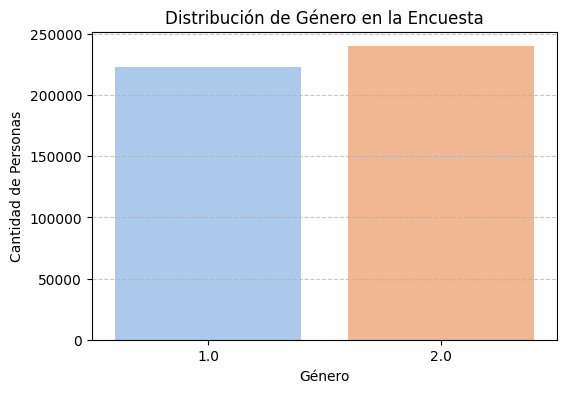

In [61]:
#Distribución del genero
plt.figure(figsize=(6, 4))
sns.countplot(x="P6020", data=pobreza, palette="pastel")
plt.xlabel("Género")
plt.ylabel("Cantidad de Personas")
plt.title("Distribución de Género en la Encuesta")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



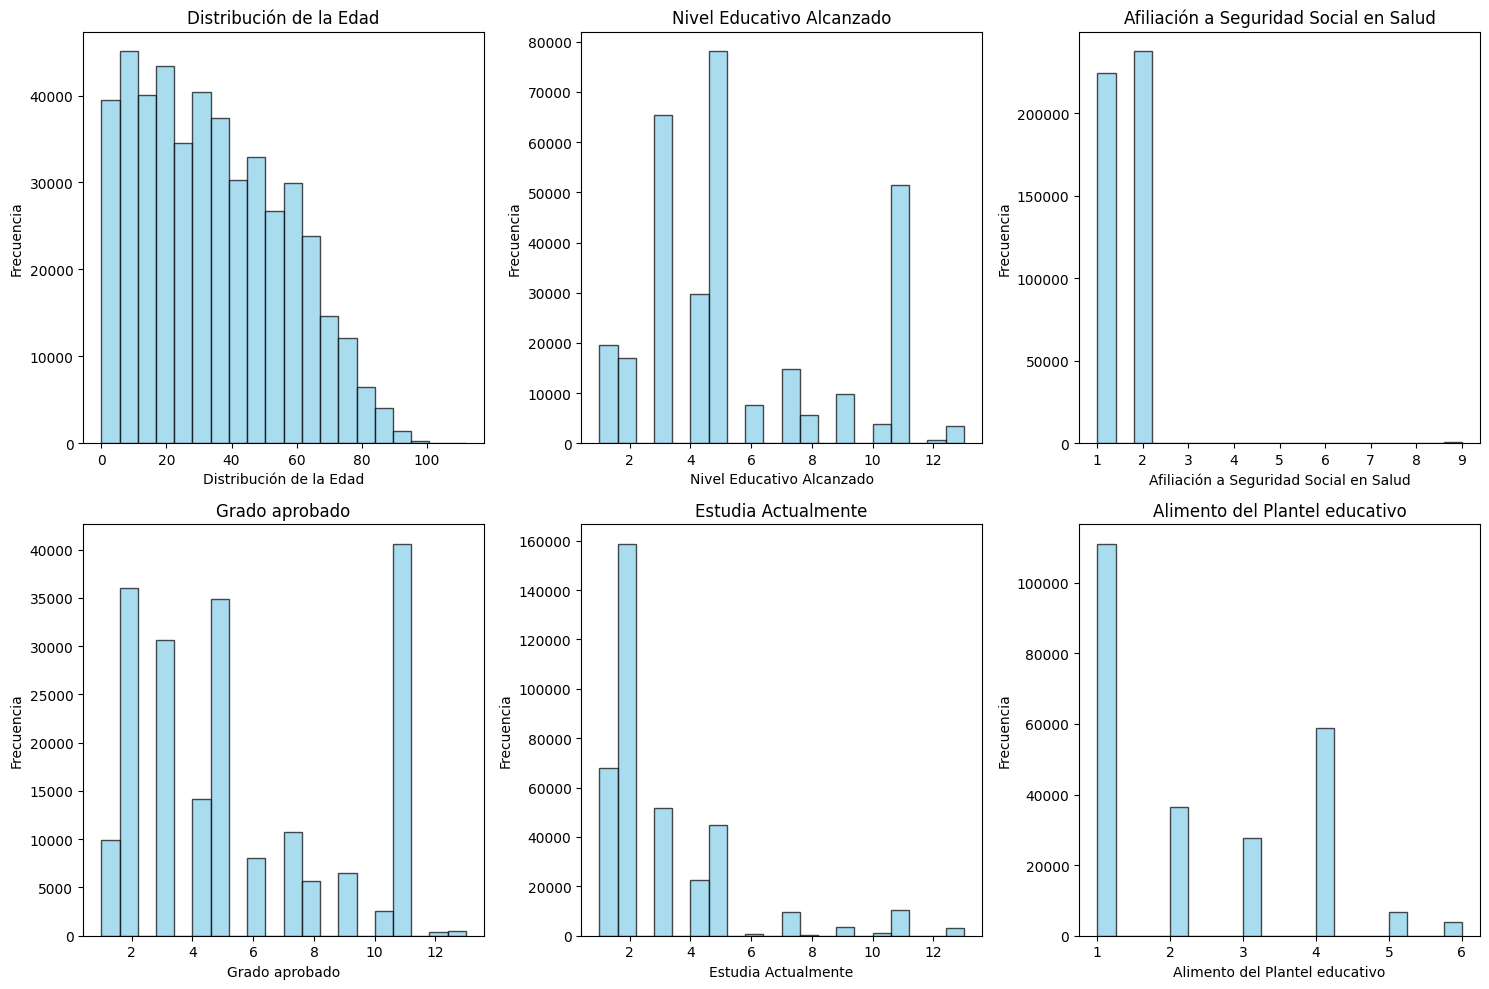

In [62]:
# Diccionario de títulos descriptivos
titulos = {
    "P6040": "Distribución de la Edad",
    "P8587": "Nivel Educativo Alcanzado",
    "P6090": "Afiliación a Seguridad Social en Salud",
    "P8587S1": "Grado aprobado",
    "P8586": "Estudia Actualmente",
    "P6180":"Alimento del Plantel educativo",
}

# Seleccionar las variables más relevantes
variables_relevantes = list(titulos.keys())

# Convertir a numérico, ignorando errores
pobreza_numeric = pobreza[variables_relevantes].apply(pd.to_numeric, errors="coerce")

# Crear la figura y subgráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Convertir en una lista para iterar fácilmente

# Generar los histogramas con títulos descriptivos
for i, col in enumerate(variables_relevantes):
    if i < len(axes):
        axes[i].hist(pobreza_numeric[col].dropna(), bins=20, color="skyblue", edgecolor="black", alpha=0.7)
        axes[i].set_title(titulos[col])  # Usar el título descriptivo
        axes[i].set_xlabel(titulos[col])
        axes[i].set_ylabel("Frecuencia")

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()


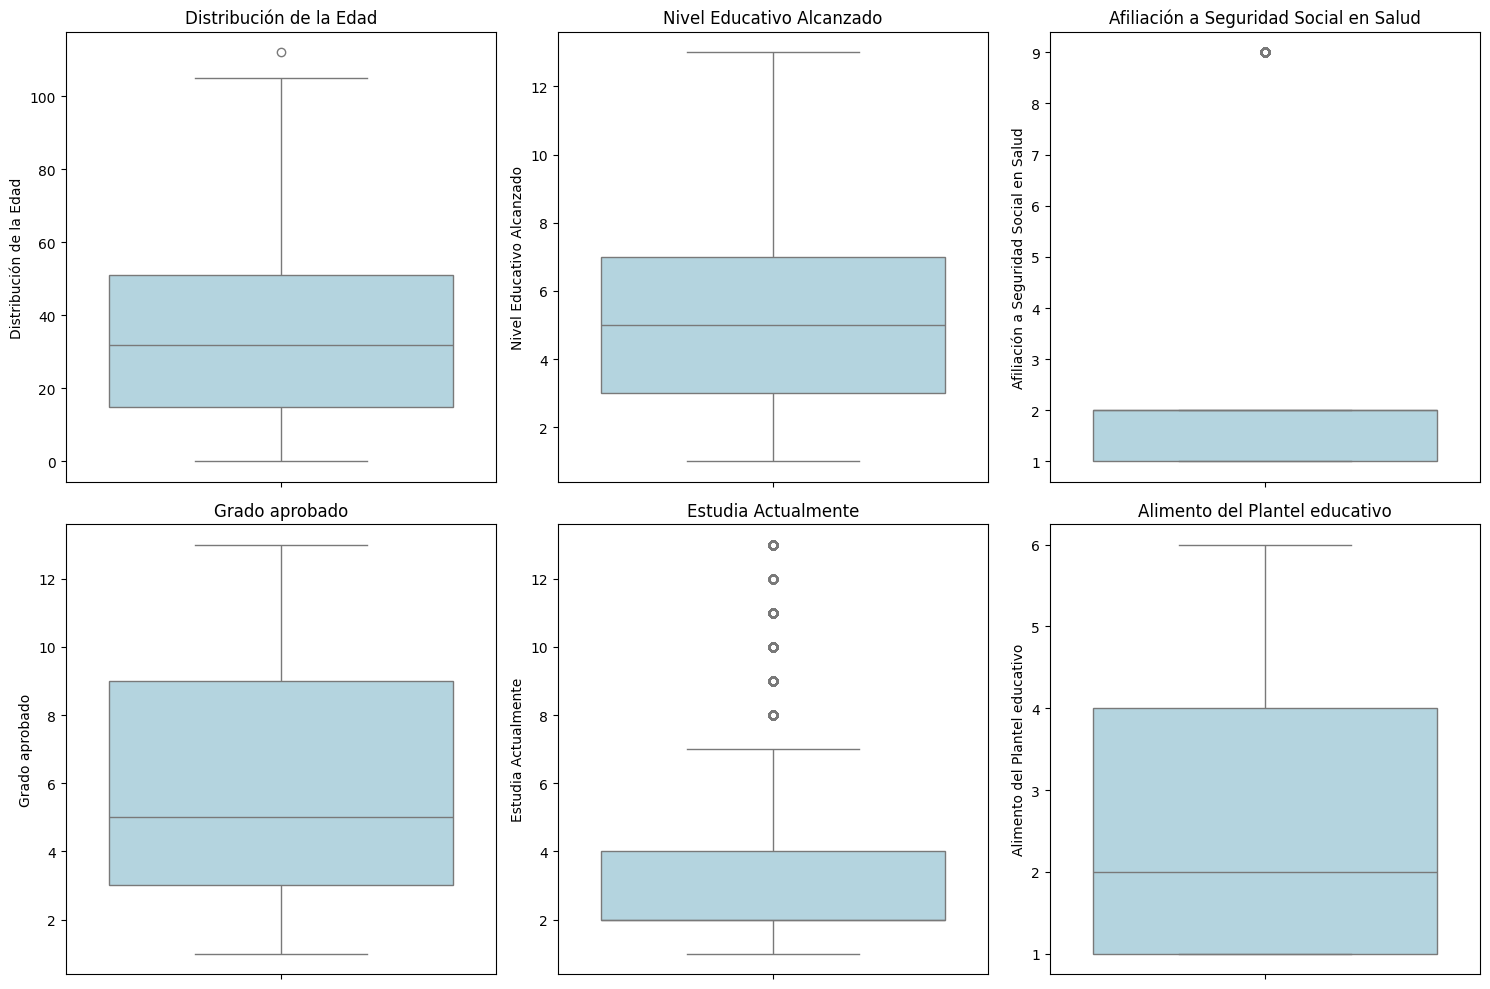

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de títulos descriptivos
titulos = {
    "P6040": "Distribución de la Edad",
    "P8587": "Nivel Educativo Alcanzado",
    "P6090": "Afiliación a Seguridad Social en Salud",
    "P8587S1": "Grado aprobado",
    "P8586": "Estudia Actualmente",
    "P6180":"Alimento del Plantel educativo",
}


# Seleccionar las variables más relevantes
variables_relevantes = list(titulos.keys())

# Convertir a numérico, ignorando errores
pobreza_numeric = pobreza[variables_relevantes].apply(pd.to_numeric, errors="coerce")

# Crear la figura y subgráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Convertir en una lista para iterar fácilmente

# Generar los boxplots con títulos descriptivos
for i, col in enumerate(variables_relevantes):
    if i < len(axes):
        sns.boxplot(y=pobreza_numeric[col], ax=axes[i], color="lightblue")
        axes[i].set_title(titulos[col])  # Usar el título descriptivo
        axes[i].set_ylabel(titulos[col])

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()


### **📝 Calidad de Datos**

---
## **Ficha de Inversión Municipal en Proyectos Públicos (PP)**

### 📚Descripción general del contenido de los conjuntos de datos
- Los conjuntos de datos presentan información sobre la inversión y gestión de programas sociales del Gobierno Nacional a nivel municipal, organizados por periodos presidenciales. Incluyen detalles sobre los recursos destinados a la atención de población vulnerable y víctimas, así como las acciones implementadas para su bienestar. Además, registran las entidades que conforman el **Sector de Inclusión Social y la Reconciliación, permitiendo analizar la distribución de la inversión, el impacto de las políticas públicas y la evolución de estos programas en los distintos municipios del país.

In [64]:
# Mostrar las primeras filas del dataset
display(inversion.head())

# Mostrar la cantidad de filas y columnas
inversion.shape

,Codigo Departamento,Codigo_Dane,Nombre_Departamento,Nombre_Municipio,Familias_Periodo_Presidencial,Personas_Periodo_Presidencial,Inversion_Periodo_Presidencial,Nombre_PeriodoPresidencial,Nombre_Programa_Salida,Descripcion,Entidad,Poblacion Objetivo,Pagos,Corte
0,63,63001,QUINDÍO,ARMENIA,0,5500,7438976000,DUQUE,PAGO EXTRA. JÓVENES EN ACCIÓN,Incentivar y fortalecer la formación de capita...,DEPARTAMENTO PARA LA PROSPERIDAD SOCIAL,"Jóvenes bachilleres, en situación de pobreza y...",5,08/31/2022 12:00:00 AM
1,63,63001,QUINDÍO,ARMENIA,1659,2327,3762062350,DUQUE,FAMILIAS EN ACCIÓN - UNIDOS,Orienta sus acciones a la formación de capital...,DEPARTAMENTO PARA LA PROSPERIDAD SOCIAL,Familias en situación de pobreza y pobreza ext...,23,08/31/2022 12:00:00 AM
2,63,63001,QUINDÍO,ARMENIA,0,9421,26769992000,DUQUE,JÓVENES EN ACCIÓN,Incentivar y fortalecer la formación de capita...,DEPARTAMENTO PARA LA PROSPERIDAD SOCIAL,"Jóvenes bachilleres, en situación de pobreza y...",23,08/31/2022 12:00:00 AM
3,63,63001,QUINDÍO,ARMENIA,3918,14425,0,DUQUE,UNIDOS,Mejorar las condiciones de vida de los hogares...,DEPARTAMENTO PARA LA PROSPERIDAD SOCIAL,Serán potenciales beneficiarios de la Estrateg...,No disponible,08/31/2022 12:00:00 AM
4,63,63001,QUINDÍO,ARMENIA,0,19,58891610,DUQUE,EMPRENDIMIENTO COLECTIVO,Crear condiciones propicias para el fortalecim...,DEPARTAMENTO PARA LA PROSPERIDAD SOCIAL,La población beneficiaria está integrada por: ...,No disponible,08/31/2022 12:00:00 AM


(56, 14)

### **📌 Compresión de los Atributos del Dataset**
## 🗺️ Ubicación Geográfica
- **Código Departamento** (`codigo_departamento`): Indica el código del departamento según DIVIPOLA.  
- **Código DANE** (`codigo_dane`): Código de identificación del municipio según el DANE.  
- **Nombre Departamento** (`nombre_departamento`): Nombre del departamento donde se informa la atención.  
- **Nombre Municipio** (`nombre_municipio`): Nombre del municipio donde se informa la atención.  

## 🏠 Cobertura del Programa
- **Familias Atendidas en el Período Presidencial** (`familias_periodo_presidencial`): Cantidad de familias atendidas por el programa en el municipio indicado.  
- **Personas Atendidas en el Período Presidencial** (`personas_periodo_presidencial`): Cantidad de personas atendidas por el programa en el municipio indicado.  
- **Inversión en el Período Presidencial** (`inversion_periodo_presidencial`): Inversión realizada por el programa en el municipio indicado.  

## 🏛️ Información del Programa
- **Nombre del Período Presidencial** (`nombre_periodopresidencial`): Nombre del período presidencial atendido.  
- **Nombre del Programa de Atención** (`nombre_programa_salida`): Nombre del programa que realizó la atención.  
- **Descripción** (`descripcion`): Descripción del funcionamiento del programa.  
- **Entidad** (`entidad`): Nombre de la entidad a la cual pertenece el programa.  
- **Población Objetivo** (`poblacion_objetivo`): Indica la población a la cual está enfocada la atención.  

## 💰 Información Financiera
- **Pagos** (`pagos`): Indica la cantidad de pagos que se han realizado.  
- **Corte** (`corte`): Indica el corte con el cual se publica la información.  

### **🔢 Tipos de Datos 🔠**

In [65]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(inversion.dtypes)

Las variables del dataset son: 

Codigo Departamento                int64
Codigo_Dane                        int64
Nombre_Departamento               object
Nombre_Municipio                  object
Familias_Periodo_Presidencial      int64
Personas_Periodo_Presidencial      int64
Inversion_Periodo_Presidencial     int64
Nombre_PeriodoPresidencial        object
Nombre_Programa_Salida            object
Descripcion                       object
Entidad                           object
Poblacion Objetivo                object
Pagos                             object
Corte                             object
dtype: object


### **📊 Analisis Estadístico y Gráficos**

###**Estadísticas** **generales**

In [66]:
# Obtener estadísticas generales de las columnas númericas
inversion.describe()

,Codigo Departamento,Codigo_Dane,Familias_Periodo_Presidencial,Personas_Periodo_Presidencial,Inversion_Periodo_Presidencial
count,56.000000,56.000000,56.000000,56.000000,5.600000e+01
mean,19.000000,19087.232143,8032.125000,10251.571429,1.921715e+10
std,21.121295,21108.927677,16593.100094,26791.898552,3.230257e+10
min,5.000000,5001.000000,0.000000,0.000000,0.000000e+00
25%,5.000000,5059.000000,0.000000,0.000000,3.276945e+08
50%,11.000000,11001.000000,1437.500000,102.000000,4.139021e+09
75%,17.000000,17486.000000,6577.750000,3887.500000,2.121110e+10
max,63.000000,63001.000000,84185.000000,173698.000000,1.337380e+11


In [67]:
#Valores nulos
inversion.isnull().sum()

,0
Codigo Departamento,0
Codigo_Dane,0
Nombre_Departamento,0
Nombre_Municipio,0
Familias_Periodo_Presidencial,0
Personas_Periodo_Presidencial,0
Inversion_Periodo_Presidencial,0
Nombre_PeriodoPresidencial,0
Nombre_Programa_Salida,0
Descripcion,0


In [68]:
#Valores únicos
inversion.nunique()

,0
Codigo Departamento,4
Codigo_Dane,5
Nombre_Departamento,4
Nombre_Municipio,4
Familias_Periodo_Presidencial,42
Personas_Periodo_Presidencial,33
Inversion_Periodo_Presidencial,50
Nombre_PeriodoPresidencial,1
Nombre_Programa_Salida,16
Descripcion,12


In [69]:
# Contar registros duplicados en todo el dataset
duplicados = internet.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


###**Gráficas**

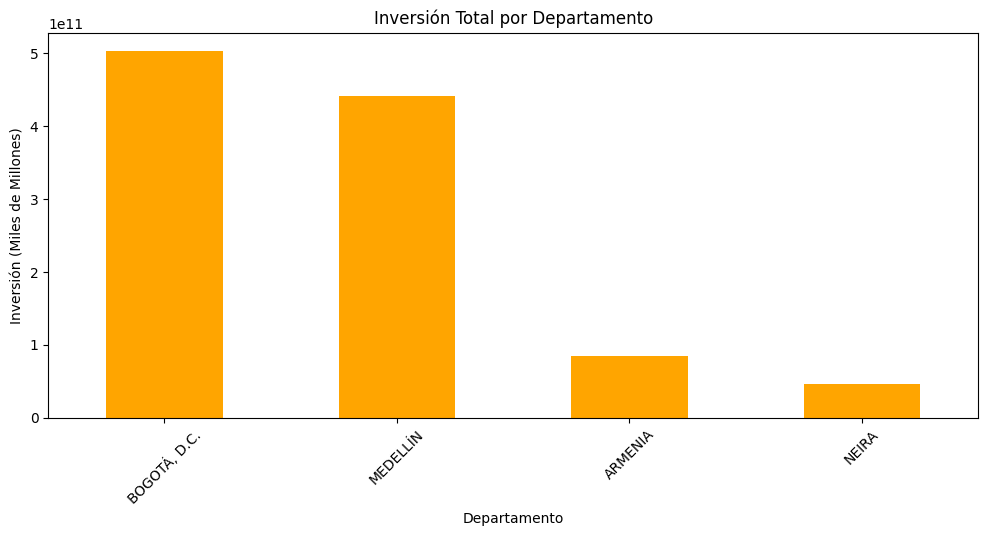

In [70]:
#Departamentos con Mayor Inversión
top_inversion_departamentos = inversion.groupby("Nombre_Municipio")["Inversion_Periodo_Presidencial"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
top_inversion_departamentos.plot(kind="bar", color="orange")
plt.title("Inversión Total por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Inversión (Miles de Millones)")
plt.xticks(rotation=45)
plt.show()

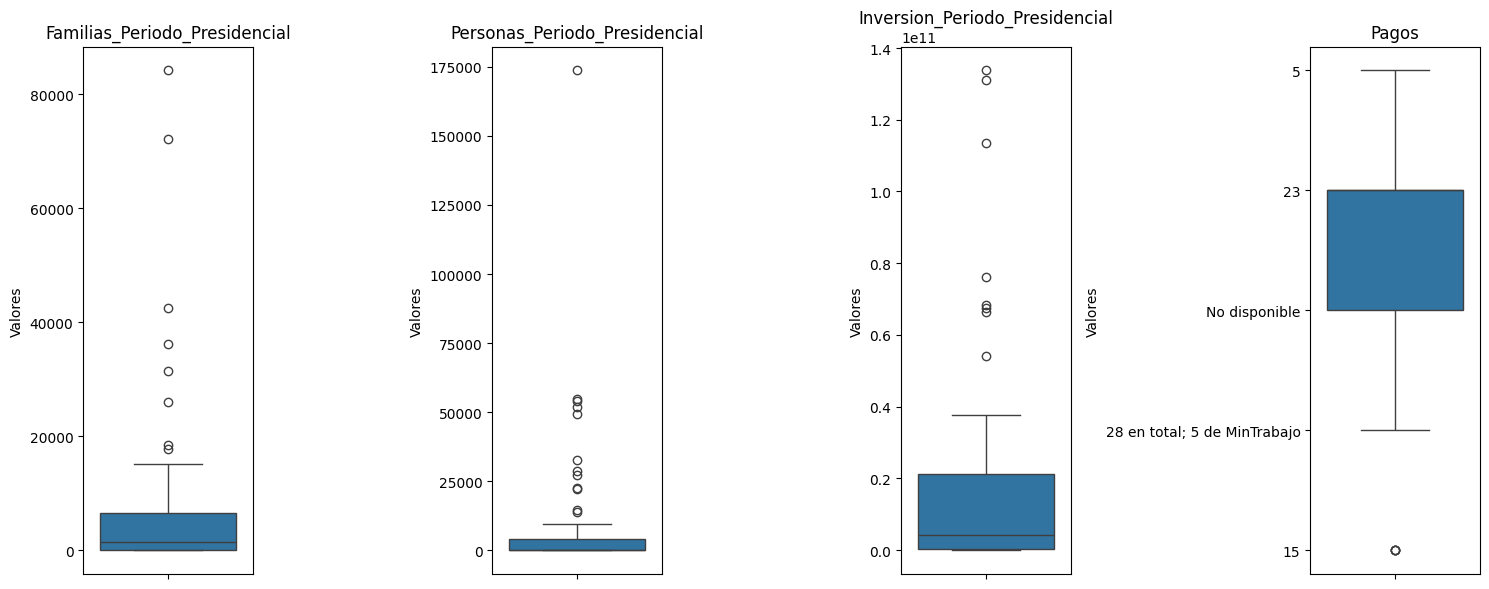

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas más relevantes
numeric_columns = ['Familias_Periodo_Presidencial', 'Personas_Periodo_Presidencial',
                   'Inversion_Periodo_Presidencial', 'Pagos']

# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 6))

# Generar un boxplot por variable numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=inversion[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("Valores")

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


<ipython-input-72-0fa9eb1c4929>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=inversion["Nombre_Programa_Salida"], order=inversion["Nombre_Programa_Salida"].value_counts().index, palette="viridis")


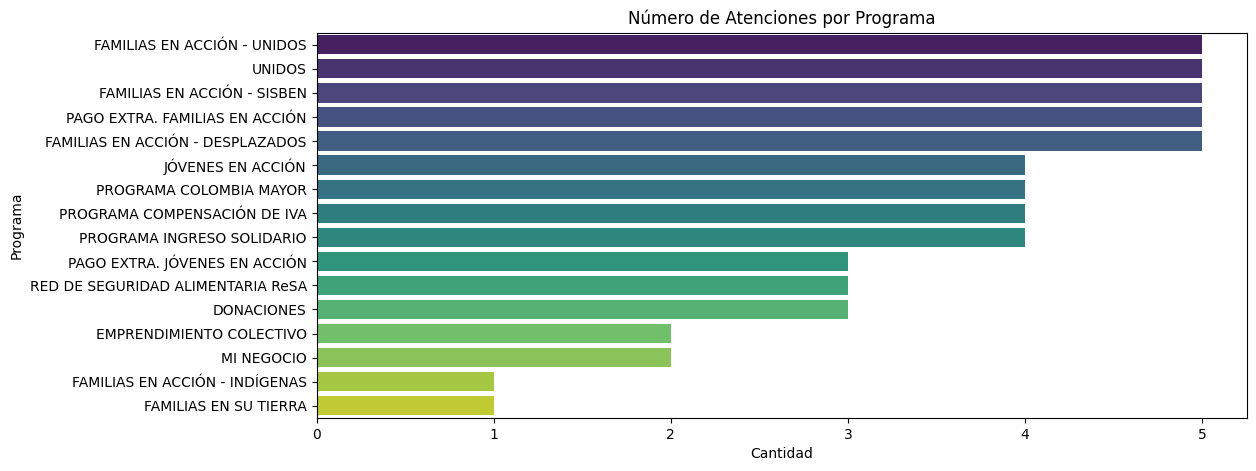

In [72]:
#´Programa de Inversion
plt.figure(figsize=(12, 5))
sns.countplot(y=inversion["Nombre_Programa_Salida"], order=inversion["Nombre_Programa_Salida"].value_counts().index, palette="viridis")
plt.title("Número de Atenciones por Programa")
plt.xlabel("Cantidad")
plt.ylabel("Programa")
plt.show()

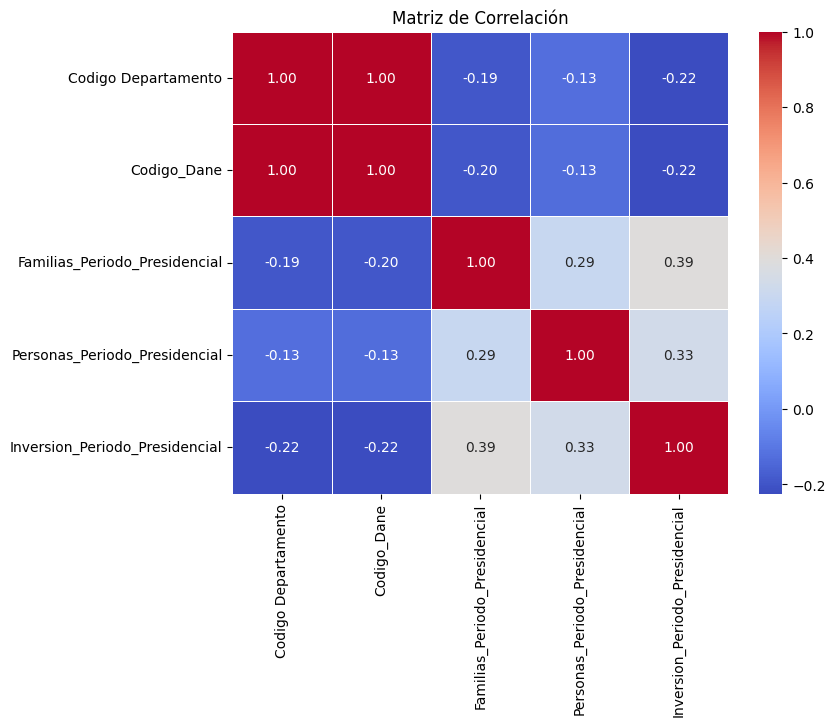

In [73]:
#Matriz de correlación
corr_matrix = inversion.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


---
## **Resultados ICFES 11**

### 📚Descripción general del contenido de los conjuntos de datos  
- Este conjunto de datos contiene información sobre los resultados educativos de los estudiantes en Colombia, con variables relacionadas con su identificación, ubicación, características sociodemográficas y puntajes en distintas áreas evaluadas.  

- Incluye detalles sobre los colegios, asì como datos familiares y socioeconómico, el conjunto de datos incluye puntajes en inglés, matemáticas, lectura crítica, ciencias naturales y sociales, además del puntaje global obtenido en la evaluación**. Esta información permite analizar la relación entre factores sociodemográficos y el desempeño académico, facilitando estudios sobre calidad educativa y equidad en el acceso a oportunidades.

In [74]:
# Mostrar las primeras filas del dataset
display(icfes_bogota.head())

# Mostrar la cantidad de filas y columnas
icfes_bogota.shape

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,3.118480e+11,311848000812,11,...,Si,Si,Si,B+,94.0,88.0,NaN,NaN,NaN,NaN
1,20132,CC,SB11201320432783,URBANO,N,A,ACADÉMICO,1.110010e+11,111001009652,11,...,No,Si,Si,A1,45.0,54.0,NaN,NaN,NaN,NaN
2,20194,CC,SB11201940541523,URBANO,NaN,A,ACADÉMICO,3.110011e+11,311001109885,11,...,Si,Si,Si,A1,56.0,45.0,27.0,27.0,35.0,176.0
3,20194,CC,SB11201940541523,URBANO,NaN,A,ACADÉMICO,3.110011e+11,311001109885,11,...,Si,Si,Si,A1,56.0,45.0,27.0,27.0,35.0,176.0
4,20132,TI,SB11201320061719,URBANO,N,A,ACADÉMICO,1.110010e+11,111001016136,11,...,Si,Si,Si,A-,40.0,57.0,NaN,NaN,NaN,NaN


(1131725, 51)

### **📌 Compresión de los Atributos del Dataset**
## 📅 Información General
- **PERIODO** (`periodo`): Periodo de los resultados.  
- **ESTU_TIPODOCUMENTO** (`estu_tipodocumento`): Tipo de documento del examinando.  
- **ESTU_CONSECUTIVO** (`estu_consecutivo`): Identificador único del examinando.  

## 🏫 Información del Colegio
- **COLE_AREA_UBICACION** (`cole_area_ubicacion`): Ubicación de la sede.  
- **COLE_BILINGUE** (`cole_bilingue`): ¿Es colegio bilingüe?  
- **COLE_CALENDARIO** (`cole_calendario`): Calendario del establecimiento.  
- **COLE_CARACTER** (`cole_caracter`): Carácter del establecimiento.  
- **COLE_COD_DANE_ESTABLECIMIENTO** (`cole_cod_dane_establecimiento`): Código DANE del establecimiento.  
- **COLE_COD_DANE_SEDE** (`cole_cod_dane_sede`): Código DANE de la sede.  
- **COLE_COD_DEPTO_UBICACION** (`cole_cod_depto_ubicacion`): Departamento de la sede.  
- **COLE_COD_MCPIO_UBICACION** (`cole_cod_mcpio_ubicacion`): Código del municipio de la sede.  
- **COLE_CODIGO_ICFES** (`cole_codigo_icfes`): Código ICFES del establecimiento.  
- **COLE_DEPTO_UBICACION** (`cole_depto_ubicacion`): Departamento de la sede.  
- **COLE_GENERO** (`cole_genero`): Género del establecimiento.  
- **COLE_JORNADA** (`cole_jornada`): Jornada de la sede.  
- **COLE_MCPIO_UBICACION** (`cole_mcpio_ubicacion`): Municipio de la sede.  
- **COLE_NATURALEZA** (`cole_naturaleza`): Naturaleza del establecimiento.  
- **COLE_NOMBRE_ESTABLECIMIENTO** (`cole_nombre_establecimiento`): Nombre del establecimiento.  
- **COLE_NOMBRE_SEDE** (`cole_nombre_sede`): Nombre de la sede.  
- **COLE_SEDE_PRINCIPAL** (`cole_sede_principal`): ¿Es la sede principal?  

## 📍 Ubicación del Examen y Residencia
- **ESTU_COD_DEPTO_PRESENTACION** (`estu_cod_depto_presentacion`): Código del departamento de presentación del examen.  
- **ESTU_COD_MCPIO_PRESENTACION** (`estu_cod_mcpio_presentacion`): Código del municipio de presentación del examen.  
- **ESTU_COD_RESIDE_DEPTO** (`estu_cod_reside_depto`): Código del departamento de residencia del examinando.  
- **ESTU_COD_RESIDE_MCPIO** (`estu_cod_reside_mcpio`): Código del municipio de residencia del examinando.  
- **ESTU_DEPTO_PRESENTACION** (`estu_depto_presentacion`): Departamento de presentación del examen.  
- **ESTU_DEPTO_RESIDE** (`estu_depto_reside`): Departamento de residencia del examinando.  
- **ESTU_MCPIO_PRESENTACION** (`estu_mcpio_presentacion`): Municipio de presentación del examen.  
- **ESTU_MCPIO_RESIDE** (`estu_mcpio_reside`): Municipio de residencia del examinando.  

## 👤 Información del Examinando
- **ESTU_ESTADOINVESTIGACION** (`estu_estadoinvestigacion`): ¿Permite usar sus datos para investigaciones?  
- **ESTU_ESTUDIANTE** (`estu_estudiante`): "S" si es estudiante o "N" si es individual.  
- **ESTU_FECHANACIMIENTO** (`estu_fechanacimiento`): Fecha de nacimiento del examinando.  
- **ESTU_GENERO** (`estu_genero`): Género del examinando.  
- **ESTU_NACIONALIDAD** (`estu_nacionalidad`): Nacionalidad del examinando.  
- **ESTU_PAIS_RESIDE** (`estu_pais_reside`): País de residencia del examinando.  
- **ESTU_PRIVADO_LIBERTAD** (`estu_privado_libertad`): ¿Es privado de la libertad?  

## 🏠 Información del Hogar
- **FAMI_CUARTOSHOGAR** (`fami_cuartoshogar`): ¿Cuántos cuartos tiene su hogar?  
- **FAMI_EDUCACIONMADRE** (`fami_educacionmadre`): Nivel de estudios de la madre.  
- **FAMI_EDUCACIONPADRE** (`fami_educacionpadre`): Nivel de estudios del padre.  
- **FAMI_ESTRATOVIVIENDA** (`fami_estratovivienda`): Estrato del examinando.  
- **FAMI_PERSONASHOGAR** (`fami_personashogar`): ¿Con cuántas personas vive?  
- **FAMI_TIENEAUTOMOVIL** (`fami_tieneautomovil`): ¿Tiene automóvil?  
- **FAMI_TIENECOMPUTADOR** (`fami_tienecomputador`): ¿Tiene computador?  
- **FAMI_TIENEINTERNET** (`fami_tieneinternet`): ¿Tiene internet?  
- **FAMI_TIENELAVADORA** (`fami_tienelavadora`): ¿Tiene lavadora?  

## 📊 Resultados del Examen
- **DESEMP_INGLES** (`desemp_ingles`): Desempeño en inglés.  
- **PUNT_INGLES** (`punt_ingles`): Puntaje en inglés.  
- **PUNT_MATEMATICAS** (`punt_matematicas`): Puntaje en matemáticas.  
- **PUNT_SOCIALES_CIUDADANAS** (`punt_sociales_ciudadanas`): Puntaje en sociales y ciudadanas.  
- **PUNT_C_NATURALES** (`punt_c_naturales`): Puntaje en ciencias naturales.  
- **PUNT_LECTURA_CRITICA** (`punt_lectura_critica`): Puntaje en lectura crítica.  
- **PUNT_GLOBAL** (`punt_global`): Puntaje global.  

### **🔢 Tipos de Datos 🔠**

In [75]:
#Identificar las variables del dataset
print("Las variables del dataset son: \n")
print(icfes_bogota.dtypes)

Las variables del dataset son: 

PERIODO                            int64
ESTU_TIPODOCUMENTO                object
ESTU_CONSECUTIVO                  object
COLE_AREA_UBICACION               object
COLE_BILINGUE                     object
COLE_CALENDARIO                   object
COLE_CARACTER                     object
COLE_COD_DANE_ESTABLECIMIENTO    float64
COLE_COD_DANE_SEDE                 int64
COLE_COD_DEPTO_UBICACION           int64
COLE_COD_MCPIO_UBICACION           int64
COLE_CODIGO_ICFES                float64
COLE_DEPTO_UBICACION              object
COLE_GENERO                       object
COLE_JORNADA                      object
COLE_MCPIO_UBICACION              object
COLE_NATURALEZA                   object
COLE_NOMBRE_ESTABLECIMIENTO       object
COLE_NOMBRE_SEDE                  object
COLE_SEDE_PRINCIPAL               object
ESTU_COD_DEPTO_PRESENTACION      float64
ESTU_COD_MCPIO_PRESENTACION      float64
ESTU_COD_RESIDE_DEPTO            float64
ESTU_COD_RESIDE_MCPIO   

### **📊 Analisis Estadístico y Gráficos**

###**Estadísticas** **generales**

In [76]:
# Obtener estadísticas generales
icfes_bogota.describe()

,PERIODO,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_CODIGO_ICFES,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
count,1.131725e+06,1.130014e+06,1.131725e+06,1131725.0,1131725.0,1.126026e+06,1.131722e+06,1.131722e+06,1.123214e+06,1.123214e+06,1.131671e+06,1.131725e+06,712661.000000,712661.000000,712661.000000,712661.000000
mean,2.015747e+04,2.079474e+11,2.075627e+11,11.0,11001.0,1.165432e+05,1.127284e+01,1.128087e+04,1.204115e+01,1.133915e+04,5.327168e+01,5.290127e+01,52.959991,53.876431,55.648569,272.171814
std,3.899695e+01,1.001486e+11,1.005423e+11,0.0,0.0,1.482942e+05,2.926962e+00,2.962650e+03,2.668625e+02,3.121090e+03,1.372799e+01,1.192393e+01,11.427464,10.261587,9.855946,49.131839
min,2.010100e+04,1.110011e+10,0.000000e+00,11.0,11001.0,0.000000e+00,5.000000e+00,5.001000e+03,5.000000e+00,5.001000e+03,-1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.012200e+04,1.110010e+11,1.110010e+11,11.0,11001.0,3.739000e+04,1.100000e+01,1.100100e+04,1.100000e+01,1.100100e+04,4.300000e+01,4.500000e+01,45.000000,47.000000,49.000000,237.000000
50%,2.015200e+04,1.118480e+11,1.118480e+11,11.0,11001.0,8.533200e+04,1.100000e+01,1.100100e+04,1.100000e+01,1.100100e+04,5.100000e+01,5.200000e+01,53.000000,54.000000,56.000000,270.000000
75%,2.019400e+04,3.110011e+11,3.110011e+11,11.0,11001.0,1.284700e+05,1.100000e+01,1.100100e+04,1.100000e+01,1.100100e+04,6.000000e+01,6.051000e+01,61.000000,61.000000,63.000000,306.000000
max,2.022400e+04,4.118480e+11,5.110001e+11,11.0,11001.0,8.066950e+05,9.900000e+01,9.900100e+04,9.999900e+04,9.999900e+04,1.172900e+02,1.270000e+02,100.000000,100.000000,100.000000,494.000000


In [77]:
#Valores nulos
pobreza.isnull().sum()

,0
DIRECTORIO,0
SECUENCIA_ENCUESTA,0
SECUENCIA_P,505542
ORDEN,505542
P6020,505542
P6040,505542
P6051,505542
FEX_C,505542
P6090,505542
P5665,732850


In [78]:
#Valores únicos
pobreza.nunique()

,0
DIRECTORIO,665845
SECUENCIA_ENCUESTA,488581
SECUENCIA_P,6
ORDEN,29
P6020,2
P6040,107
P6051,56945
FEX_C,60567
P6090,3
P5665,8


In [79]:
# Contar registros duplicados en todo el dataset
duplicados = internet.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


###**Gráficas**

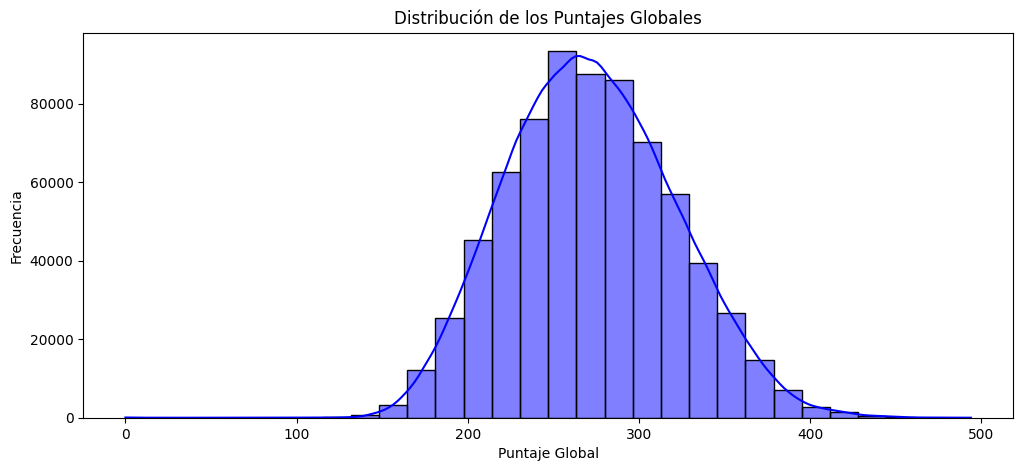

In [80]:
#Distribución de los Puntajes Globales ##cambiar nombres de dataset para corroborar
dataset=icfes_bogota
plt.figure(figsize=(12, 5))
sns.histplot(dataset["PUNT_GLOBAL"], bins=30, kde=True, color="blue")
plt.title("Distribución de los Puntajes Globales")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

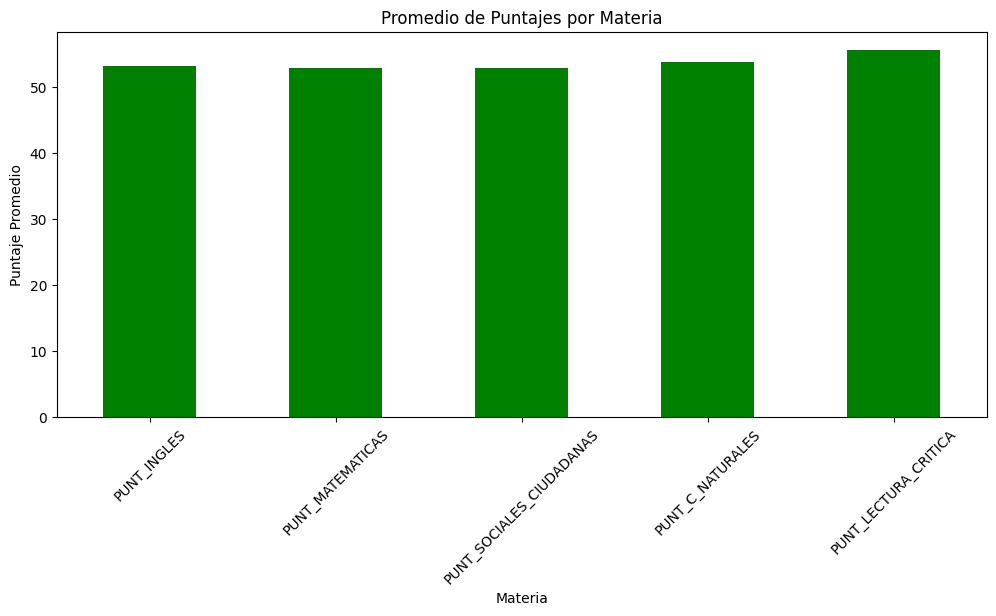

In [81]:
#Promedio de Puntajes por Materia
promedios = dataset[["PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS",
                     "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA"]].mean()
plt.figure(figsize=(12, 5))
promedios.plot(kind="bar", color="green")
plt.title("Promedio de Puntajes por Materia")
plt.xlabel("Materia")
plt.ylabel("Puntaje Promedio")
plt.xticks(rotation=45)
plt.show()

<ipython-input-82-ce8a1e91ac3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", palette="coolwarm")


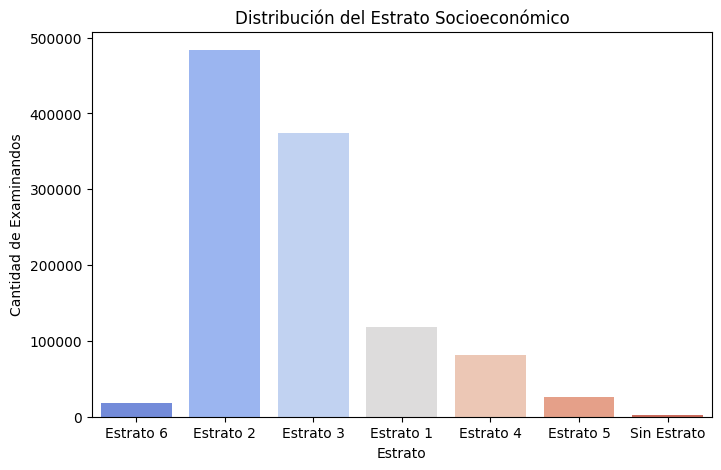

In [82]:
#Distribución del Estrato Socioeconómico de los Examinandos
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", palette="coolwarm")
plt.title("Distribución del Estrato Socioeconómico")
plt.xlabel("Estrato")
plt.ylabel("Cantidad de Examinandos")
plt.show()

<ipython-input-83-43b7b06a7d8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", palette="coolwarm")


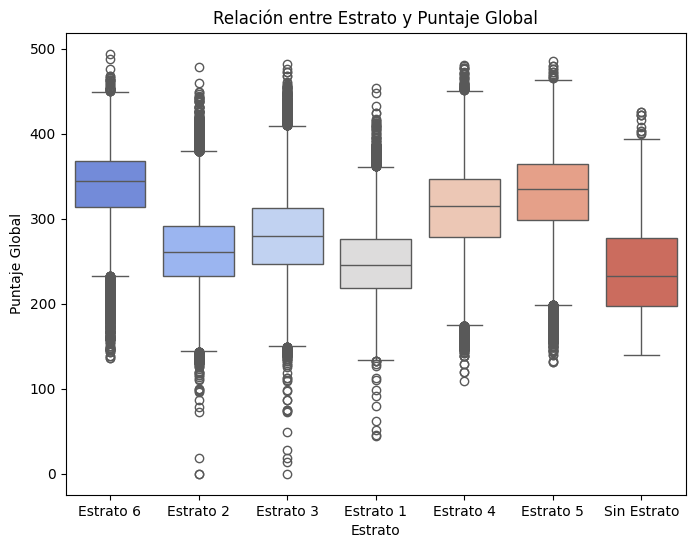

In [83]:
#Relación entre el Estrato y el Puntaje Global
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", palette="coolwarm")
plt.title("Relación entre Estrato y Puntaje Global")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")
plt.show()

<ipython-input-84-eed6afb78e3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="ESTU_GENERO", y="PUNT_GLOBAL", palette="muted")


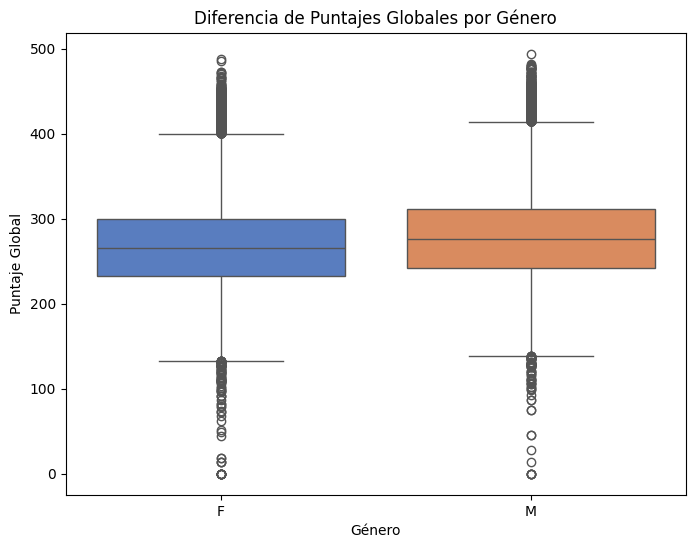

In [84]:
#Diferencia de Puntajes por Género
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="ESTU_GENERO", y="PUNT_GLOBAL", palette="muted")
plt.title("Diferencia de Puntajes Globales por Género")
plt.xlabel("Género")
plt.ylabel("Puntaje Global")
plt.show()

---
## **Filtros Limpieza y transformación inicial**

En esta sección, se realizará un proceso de limpieza, filtrado y transformación inicial sobre los diferentes conjuntos de datos utilizados en el análisis. El objetivo principal es garantizar la calidad de los datos eliminando inconsistencias, manejando valores nulos y eliminando valores atípicos que puedan afectar los análisis posteriores.

Para ello, se aplicarán los siguientes pasos en cada uno de los nueve conjuntos de datos:

**Manejo de valores nulos:**



*   Se identificará el porcentaje de valores faltantes en cada variable.

*   Se eliminarán columnas con más del 35% de valores nulos, ya que pueden afectar la calidad del análisis.

*  Se imputarán los valores faltantes de las variables numéricas utilizando la media de la columna.

*   Se imputarán los valores faltantes de las variables categóricas utilizando la moda (valor más frecuente).


**Eliminación de valores atípicos**


*   Se analizará la distribución de los valores en cada variable numérica.

*    Se utilizará el método del rango intercuartílico (IQR) para detectar valores extremos y eliminarlos, reduciendo el impacto de datos anómalos en el análisis.







### **Conjunto de datos `Icfes_bogota`**

**Limpieza de datos**

In [85]:
# 1. Manejo de valores nulos
df1=icfes_bogota
# Columnas con más del 35% de valores nulos que se eliminarán
cols_to_drop = ["PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"]
df1.drop(columns=cols_to_drop, inplace=True)

# Imputación de valores numéricos con la media
df1.fillna(df1.mean(numeric_only=True), inplace=True)

# Imputación de valores categóricos con la moda
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

# 2. Detección y eliminación de valores atípicos (usando IQR)
numeric_cols = df1.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

# Guardar el dataset limpio
icfes_bogota_limpio=df1

<ipython-input-85-0bf3b6d89639>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace=True)


In [86]:
#Verificar el número de campos vacios
cantidad_nulos1 = icfes_bogota_limpio.isnull().sum()  # conteo de los nulos
print("Cantidad de campos vacios en cada columna: \n", cantidad_nulos1)

Cantidad de campos vacios en cada columna: 
 PERIODO                          0
ESTU_TIPODOCUMENTO               0
ESTU_CONSECUTIVO                 0
COLE_AREA_UBICACION              0
COLE_BILINGUE                    0
COLE_CALENDARIO                  0
COLE_CARACTER                    0
COLE_COD_DANE_ESTABLECIMIENTO    0
COLE_COD_DANE_SEDE               0
COLE_COD_DEPTO_UBICACION         0
COLE_COD_MCPIO_UBICACION         0
COLE_CODIGO_ICFES                0
COLE_DEPTO_UBICACION             0
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
COLE_NATURALEZA                  0
COLE_NOMBRE_ESTABLECIMIENTO      0
COLE_NOMBRE_SEDE                 0
COLE_SEDE_PRINCIPAL              0
ESTU_COD_DEPTO_PRESENTACION      0
ESTU_COD_MCPIO_PRESENTACION      0
ESTU_COD_RESIDE_DEPTO            0
ESTU_COD_RESIDE_MCPIO            0
ESTU_DEPTO_PRESENTACION          0
ESTU_DEPTO_RESIDE                0
ESTU_ESTADOINVESTIGACION         0
ESTU_ESTUD

In [87]:
icfes_bogota_limpio.shape

(1000792, 47)

En el dataset de resultados de ICFES Bogotá, se identificaron valores nulos en varias variables, algunas con más del 35% de datos faltantes. Se eliminaron las columnas "PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA" y "PUNT_GLOBAL", ya que el alto porcentaje de valores nulos afectaría la calidad del análisis. Para las demás variables, los valores faltantes numéricos fueron imputados con la media, mientras que los categóricos fueron reemplazados con la moda. Además, se aplicó el método IQR para eliminar valores atípicos en las variables numéricas, mejorando así la representatividad del conjunto de datos.

### **Conjunto de datos `Icfes_medellin`**

**Limpieza de datos**

In [88]:
# Ver las primeras filas
print(icfes_medellin.head())

# Ver información general (tipos de datos, valores nulos, etc.)
print(icfes_medellin.info())

# Ver cuántos valores nulos hay por columna
print(icfes_medellin.isnull().sum())

# Ver duplicados
print(f"Duplicados: {icfes_medellin.duplicated().sum()}")

icfes_medellin_viejo = icfes_medellin


   PERIODO ESTU_TIPODOCUMENTO  ESTU_CONSECUTIVO COLE_AREA_UBICACION  \
0    20172                 TI  SB11201720518410              URBANO   
1    20162                 TI  SB11201620355612              URBANO   
2    20122                 TI  SB11201220572895              URBANO   
3    20122                 TI  SB11201220106839              URBANO   
4    20152                 CC  SB11201520202169              URBANO   

  COLE_BILINGUE COLE_CALENDARIO      COLE_CARACTER  \
0             N               A  TÉCNICO/ACADÉMICO   
1             N               A            TÉCNICO   
2             N               A          ACADÉMICO   
3             N               A  TÉCNICO/ACADÉMICO   
4             N            OTRO          ACADÉMICO   

   COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
0                   405001016946        405001016946   
1                   305001004811        305001004811   
2                   105001000141        105001000141   
3                   1050

In [89]:
# 1. Eliminar filas con valores nulos
icfes_medellin.dropna(inplace=True)

# 2. Convertir las columnas de puntajes a tipo float (por si tienen valores erróneos)
cols_numericas = [
    "PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"
]
icfes_medellin[cols_numericas] = icfes_medellin[cols_numericas].apply(pd.to_numeric, errors="coerce")

# 3. Filtrar valores fuera de los rangos esperados
icfes_medellin = icfes_medellin[
    (icfes_medellin["PUNT_INGLES"].between(0, 100)) &
    (icfes_medellin["PUNT_MATEMATICAS"].between(0, 100)) &
    (icfes_medellin["PUNT_SOCIALES_CIUDADANAS"].between(0, 100)) &
    (icfes_medellin["PUNT_C_NATURALES"].between(0, 100)) &
    (icfes_medellin["PUNT_LECTURA_CRITICA"].between(0, 100)) &
    (icfes_medellin["PUNT_GLOBAL"].between(0, 500))
]

# 4. Verificar cambios
print(icfes_medellin.info())
print(icfes_medellin.isnull().sum())
print(f"Duplicados: {icfes_medellin.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
Index: 194662 entries, 0 to 450741
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PERIODO                        194662 non-null  int64  
 1   ESTU_TIPODOCUMENTO             194662 non-null  object 
 2   ESTU_CONSECUTIVO               194662 non-null  object 
 3   COLE_AREA_UBICACION            194662 non-null  object 
 4   COLE_BILINGUE                  194662 non-null  object 
 5   COLE_CALENDARIO                194662 non-null  object 
 6   COLE_CARACTER                  194662 non-null  object 
 7   COLE_COD_DANE_ESTABLECIMIENTO  194662 non-null  int64  
 8   COLE_COD_DANE_SEDE             194662 non-null  int64  
 9   COLE_COD_DEPTO_UBICACION       194662 non-null  int64  
 10  COLE_COD_MCPIO_UBICACION       194662 non-null  int64  
 11  COLE_CODIGO_ICFES              194662 non-null  float64
 12  COLE_DEPTO_UBICACION           1946

<ipython-input-90-d7b868567f70>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-90-d7b868567f70>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


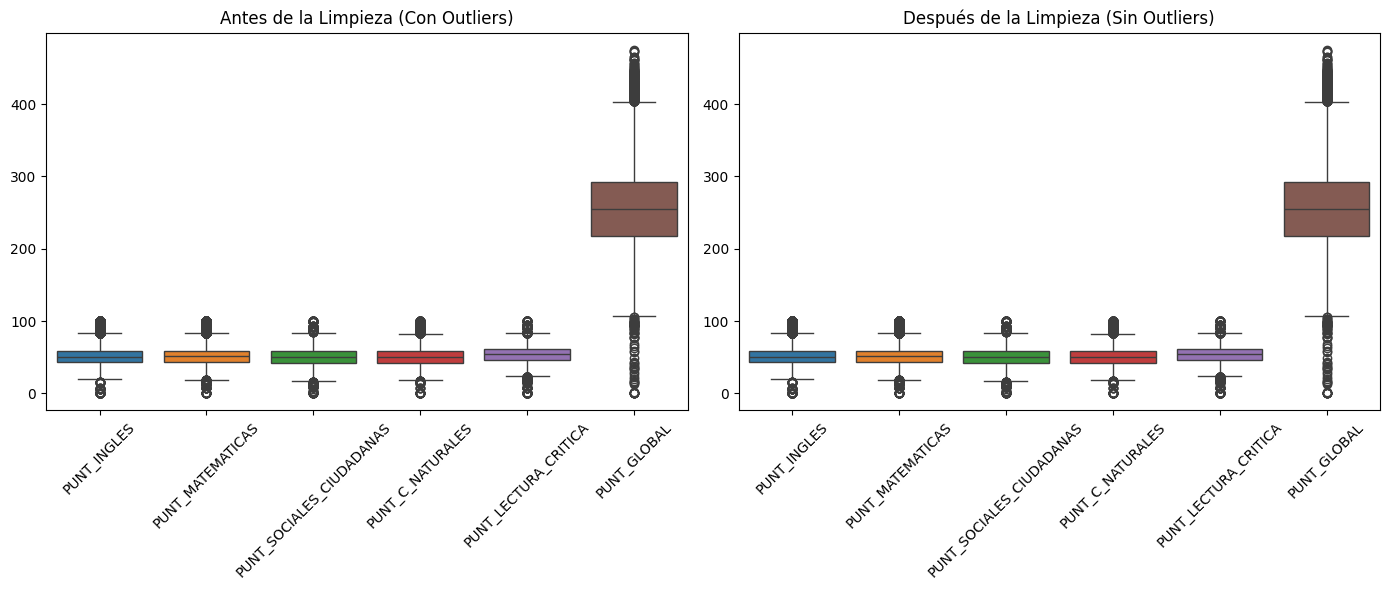

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos gráficos (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset original sin limpiar
sns.boxplot(data=icfes_medellin_viejo[cols_numericas], ax=axes[0])
axes[0].set_title("Antes de la Limpieza (Con Outliers)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Dataset limpio sin valores atípicos
sns.boxplot(data=icfes_medellin[cols_numericas], ax=axes[1])
axes[1].set_title("Después de la Limpieza (Sin Outliers)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

En general el dataset estaba bastante limpio, sin embargo tenia muchos valores nulos necesarios para el desarrollo del proyecto.

### **Conjunto de datos `Icfes_neiva`**

**Limpieza de datos**

In [91]:
# Ver las primeras filas
print(icfes_neiva.head())

# Ver información general (tipos de datos, valores nulos, etc.)
print(icfes_neiva.info())

# Ver cuántos valores nulos hay por columna
print(icfes_neiva.isnull().sum())

# Ver duplicados
print(f"Duplicados: {icfes_neiva.duplicated().sum()}")

icfes_neiva_viejo = icfes_neiva


   PERIODO ESTU_TIPODOCUMENTO  ESTU_CONSECUTIVO COLE_AREA_UBICACION  \
0    20172                 TI  SB11201720462221              URBANO   
1    20122                 TI  SB11201220065376              URBANO   
2    20172                 CC  SB11201720516444              URBANO   
3    20122                 TI  SB11201220064854              URBANO   
4    20172                 TI  SB11201720193472              URBANO   

  COLE_BILINGUE COLE_CALENDARIO      COLE_CARACTER  \
0             N               A            TÉCNICO   
1             N               A          ACADÉMICO   
2             N               A          ACADÉMICO   
3             N               A          ACADÉMICO   
4             N               A  TÉCNICO/ACADÉMICO   

   COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
0                   341001005440        341001005440   
1                   341001061251        341001061251   
2                   341001060979        341001060979   
3                   3410

In [92]:

# Verificar información inicial
info_neiva = icfes_neiva.info()
nulos_neiva = icfes_neiva.isnull().sum()
duplicados_neiva = icfes_neiva.duplicated().sum()

# Eliminar filas con valores nulos
icfes_neiva_cleaned = icfes_neiva.dropna()

# Filtrar valores atípicos en puntajes (0-100 por área, 0-500 global)
columns_puntajes = ["PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA"]
for col in columns_puntajes:
    icfes_neiva_cleaned = icfes_neiva_cleaned[(icfes_neiva_cleaned[col] >= 0) & (icfes_neiva_cleaned[col] <= 100)]

icfes_neiva_cleaned = icfes_neiva_cleaned[(icfes_neiva_cleaned["PUNT_GLOBAL"] >= 0) & (icfes_neiva_cleaned["PUNT_GLOBAL"] <= 500)]

# Eliminar duplicados
icfes_neiva_cleaned = icfes_neiva_cleaned.drop_duplicates()

# Resumen de cambios
nulos_despues = icfes_neiva_cleaned.isnull().sum()
duplicados_despues = icfes_neiva_cleaned.duplicated().sum()
shape_original = icfes_neiva.shape
shape_limpio = icfes_neiva_cleaned.shape

shape_original, nulos_neiva, duplicados_neiva, shape_limpio, nulos_despues, duplicados_despues


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60670 entries, 0 to 60669
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PERIODO                        60670 non-null  int64  
 1   ESTU_TIPODOCUMENTO             60670 non-null  object 
 2   ESTU_CONSECUTIVO               60670 non-null  object 
 3   COLE_AREA_UBICACION            60670 non-null  object 
 4   COLE_BILINGUE                  56026 non-null  object 
 5   COLE_CALENDARIO                60670 non-null  object 
 6   COLE_CARACTER                  59899 non-null  object 
 7   COLE_COD_DANE_ESTABLECIMIENTO  60670 non-null  int64  
 8   COLE_COD_DANE_SEDE             60670 non-null  int64  
 9   COLE_COD_DEPTO_UBICACION       60670 non-null  int64  
 10  COLE_COD_MCPIO_UBICACION       60670 non-null  int64  
 11  COLE_CODIGO_ICFES              60424 non-null  float64
 12  COLE_DEPTO_UBICACION           60670 non-null 

((60670, 51),
 PERIODO                              0
 ESTU_TIPODOCUMENTO                   0
 ESTU_CONSECUTIVO                     0
 COLE_AREA_UBICACION                  0
 COLE_BILINGUE                     4644
 COLE_CALENDARIO                      0
 COLE_CARACTER                      771
 COLE_COD_DANE_ESTABLECIMIENTO        0
 COLE_COD_DANE_SEDE                   0
 COLE_COD_DEPTO_UBICACION             0
 COLE_COD_MCPIO_UBICACION             0
 COLE_CODIGO_ICFES                  246
 COLE_DEPTO_UBICACION                 0
 COLE_GENERO                          0
 COLE_JORNADA                         0
 COLE_MCPIO_UBICACION                 0
 COLE_NATURALEZA                      0
 COLE_NOMBRE_ESTABLECIMIENTO          0
 COLE_NOMBRE_SEDE                     0
 COLE_SEDE_PRINCIPAL                  0
 ESTU_COD_DEPTO_PRESENTACION          1
 ESTU_COD_MCPIO_PRESENTACION          1
 ESTU_COD_RESIDE_DEPTO              244
 ESTU_COD_RESIDE_MCPIO              244
 ESTU_DEPTO_PRESENTACION  

<ipython-input-93-605f867cf24e>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-93-605f867cf24e>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


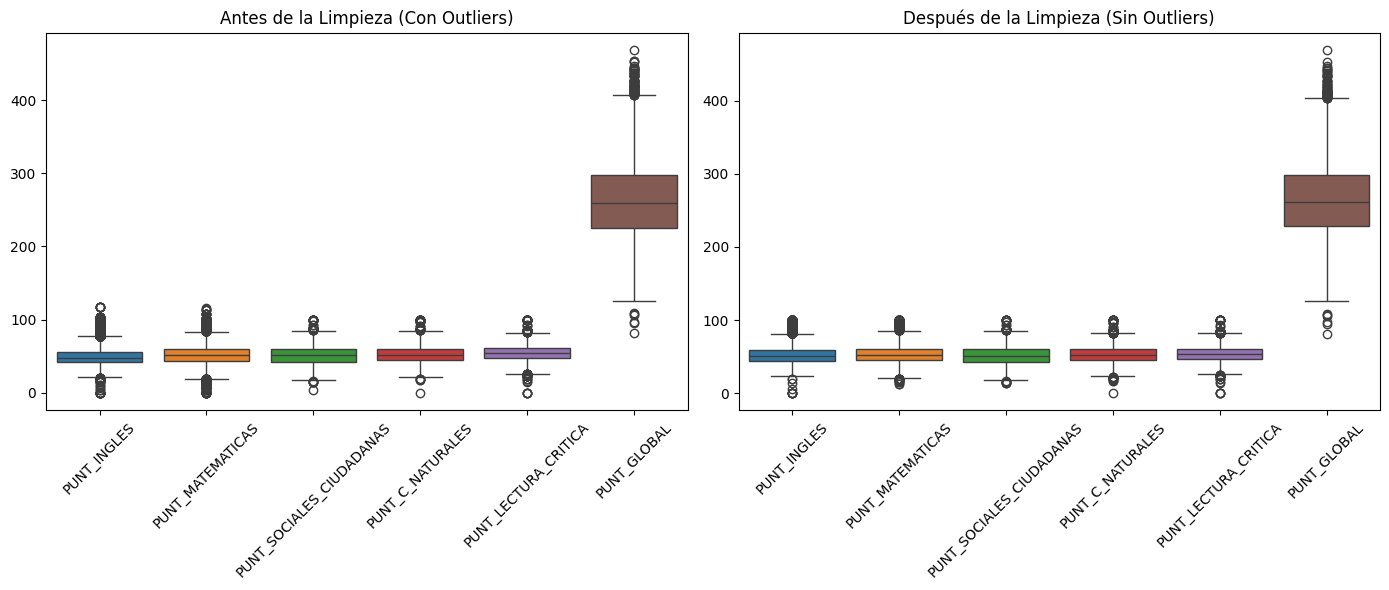

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos gráficos (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset original sin limpiar
sns.boxplot(data=icfes_neiva_viejo[cols_numericas], ax=axes[0])
axes[0].set_title("Antes de la Limpieza (Con Outliers)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Dataset limpio sin valores atípicos
sns.boxplot(data=icfes_neiva_cleaned[cols_numericas], ax=axes[1])
axes[1].set_title("Después de la Limpieza (Sin Outliers)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


En general el dataset estaba bastante limpio, sin embargo tenia muchos valores nulos necesarios para el desarrollo del proyecto. Ademas se ecnotraron alguno datos por fuera de los limites de puntuacion, por ejemplo en alguna area por encima de 100 el cual es el maximo

### **Conjunto de datos `Icfes_armenia`**

**Limpieza de datos**

In [94]:
# Ver las primeras filas
print(icfes_armenia.head())

# Ver información general (tipos de datos, valores nulos, etc.)
print(icfes_armenia.info())

# Ver cuántos valores nulos hay por columna
print(icfes_armenia.isnull().sum())

# Ver duplicados
print(f"Duplicados: {icfes_armenia.duplicated().sum()}")

icfes_armenia_viejo = icfes_armenia

   PERIODO ESTU_TIPODOCUMENTO  ESTU_CONSECUTIVO COLE_AREA_UBICACION  \
0    20224                 TI  SB11202240549969              URBANO   
1    20172                 TI  SB11201720123594              URBANO   
2    20122                 TI  SB11201220201725              URBANO   
3    20132                 CC  SB11201320131603              URBANO   
4    20162                 TI  SB11201620115746              URBANO   

  COLE_BILINGUE COLE_CALENDARIO      COLE_CARACTER  \
0             N               A  TÉCNICO/ACADÉMICO   
1             N               A  TÉCNICO/ACADÉMICO   
2           NaN               A          ACADÉMICO   
3             N               A  TÉCNICO/ACADÉMICO   
4             N               A  TÉCNICO/ACADÉMICO   

   COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
0                   163001002496        163001002496   
1                   163001002941        163001002941   
2                   363001002771        363001002771   
3                   1630

In [95]:
# Eliminar filas con valores nulos en las columnas relevantes
columnas_relevantes = [
    "PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"
]
icfes_armenia = icfes_armenia.dropna(subset=columnas_relevantes)

# Convertir las columnas de puntajes a numéricas
for col in columnas_relevantes:
    icfes_armenia[col] = pd.to_numeric(icfes_armenia[col], errors="coerce")

# Filtrar los datos atípicos (rango válido: 0-100 para áreas, 0-500 para puntaje global)
icfes_armenia = icfes_armenia[
    (icfes_armenia["PUNT_INGLES"].between(0, 100)) &
    (icfes_armenia["PUNT_MATEMATICAS"].between(0, 100)) &
    (icfes_armenia["PUNT_SOCIALES_CIUDADANAS"].between(0, 100)) &
    (icfes_armenia["PUNT_C_NATURALES"].between(0, 100)) &
    (icfes_armenia["PUNT_LECTURA_CRITICA"].between(0, 100)) &
    (icfes_armenia["PUNT_GLOBAL"].between(0, 500))
]

# Verificar la limpieza
icfes_armenia.info(), icfes_armenia.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 28609 entries, 0 to 44838
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PERIODO                        28609 non-null  int64  
 1   ESTU_TIPODOCUMENTO             28609 non-null  object 
 2   ESTU_CONSECUTIVO               28609 non-null  object 
 3   COLE_AREA_UBICACION            28609 non-null  object 
 4   COLE_BILINGUE                  25586 non-null  object 
 5   COLE_CALENDARIO                28609 non-null  object 
 6   COLE_CARACTER                  28609 non-null  object 
 7   COLE_COD_DANE_ESTABLECIMIENTO  28609 non-null  int64  
 8   COLE_COD_DANE_SEDE             28609 non-null  int64  
 9   COLE_COD_DEPTO_UBICACION       28609 non-null  int64  
 10  COLE_COD_MCPIO_UBICACION       28609 non-null  int64  
 11  COLE_CODIGO_ICFES              28609 non-null  float64
 12  COLE_DEPTO_UBICACION           28609 non-null  obje

<ipython-input-95-c4526187e758>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icfes_armenia[col] = pd.to_numeric(icfes_armenia[col], errors="coerce")


(None,
             PERIODO  COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
 count  28609.000000                   2.860900e+04        2.860900e+04   
 mean   20179.813555                   2.007374e+11        2.007374e+11   
 std       28.373637                   8.053751e+10        8.053751e+10   
 min    20142.000000                   1.630010e+11        1.630010e+11   
 25%    20152.000000                   1.630010e+11        1.630010e+11   
 50%    20172.000000                   1.630010e+11        1.630010e+11   
 75%    20194.000000                   1.630010e+11        1.630010e+11   
 max    20224.000000                   4.630010e+11        4.630010e+11   
 
        COLE_COD_DEPTO_UBICACION  COLE_COD_MCPIO_UBICACION  COLE_CODIGO_ICFES  \
 count                   28609.0                   28609.0        28609.00000   
 mean                       63.0                   63001.0       223824.45220   
 std                         0.0                       0.0       242401.3

<ipython-input-96-3334ab0e69f3>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-96-3334ab0e69f3>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


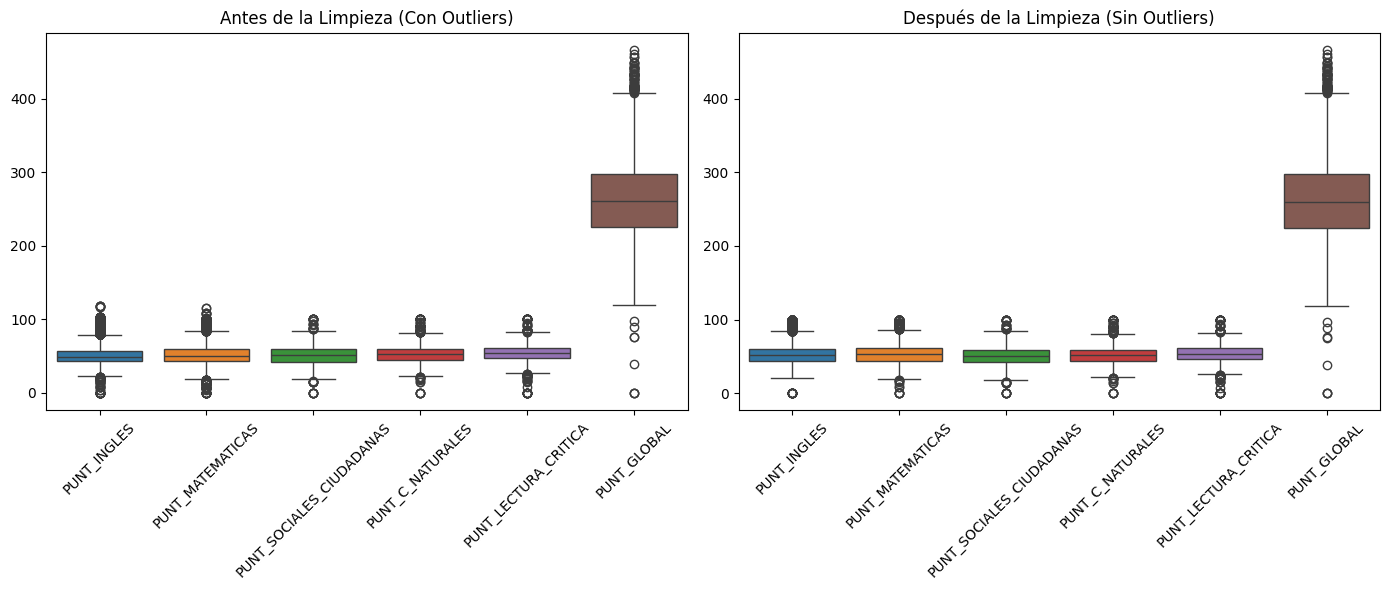

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos gráficos (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset original sin limpiar
sns.boxplot(data=icfes_armenia_viejo[cols_numericas], ax=axes[0])
axes[0].set_title("Antes de la Limpieza (Con Outliers)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Dataset limpio sin valores atípicos
sns.boxplot(data=icfes_armenia[cols_numericas], ax=axes[1])
axes[1].set_title("Después de la Limpieza (Sin Outliers)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


En general el dataset estaba bastante limpio, sin embargo tenia muchos valores nulos necesarios para el desarrollo del proyecto. Ademas se ecnotraron alguno datos por fuera de los limites de puntuacion, por ejemplo en alguna area por encima de 100 el cual es el maximo

### **Conjunto de datos `Pobreza`**



**Limpieza de datos**

In [97]:
#Verificar el número de campos vacios
cantidad_nulos = pobreza.isnull().sum()  # conteo de los nulos
#Calcular el porcentaje de campos vacios por columna
cantidad_registros = pobreza.shape[0]
print("Cantidad de registros: ", pobreza.shape[0])
Porcentaje = cantidad_nulos/cantidad_registros*100
print("Porcentaje de campos vacios por columna: \n", Porcentaje)

Cantidad de registros:  968426
Porcentaje de campos vacios por columna: 
 DIRECTORIO                              0.000000
SECUENCIA_ENCUESTA                      0.000000
SECUENCIA_P                            52.202440
ORDEN                                  52.202440
P6020                                  52.202440
P6040                                  52.202440
P6051                                  52.202440
FEX_C                                  52.202440
P6090                                  52.202440
P5665                                  75.674342
P8563                                  97.648452
P51                                    96.655811
P55                                    96.764337
P774                                   76.001574
P6160                                  55.546629
P8586                                  61.250731
P8587                                  68.269439
P8587S1                                79.275959
P1088                                  88.63

In [98]:
# 1. Manejo de valores nulos
df_pobreza=pobreza
# Identificar el porcentaje de valores nulos por columna
missing_percentage = df_pobreza.isnull().sum() / len(df_pobreza) * 100

# Eliminar columnas con más del 35% de valores nulos
cols_to_drop = missing_percentage[missing_percentage > 35].index
df_pobreza.drop(columns=cols_to_drop, inplace=True)

# Imputación de valores numéricos con la media
numeric_cols = df_pobreza.select_dtypes(include=[np.number]).columns
df_pobreza[numeric_cols] = df_pobreza[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Imputación de valores categóricos con la moda
categorical_cols = df_pobreza.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_pobreza[col].fillna(df_pobreza[col].mode()[0], inplace=True)

# 2. Detección y eliminación de valores atípicos (usando IQR)
numeric_cols = df_pobreza.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df_pobreza[col].quantile(0.25)
    Q3 = df_pobreza[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_pobreza = df_pobreza[(df_pobreza[col] >= lower_bound) & (df_pobreza[col] <= upper_bound)]

# Guardar el dataset limpio
pobreza_limpio=df_pobreza

<ipython-input-98-f4c8885d1297>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pobreza[col].fillna(df_pobreza[col].mode()[0], inplace=True)


In [99]:
pobreza_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968426 entries, 0 to 968425
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   DIRECTORIO          968426 non-null  object
 1   SECUENCIA_ENCUESTA  968426 non-null  object
dtypes: object(2)
memory usage: 14.8+ MB


El dataset de pobreza presentó un alto porcentaje de valores nulos en varias columnas, algunas con más del 95% de datos faltantes. Para mejorar la calidad del análisis, se eliminaron las columnas con más del 35% de valores nulos. Para las variables restantes, los valores numéricos faltantes fueron reemplazados con la media, y los categóricos con la moda. También se aplicó el método IQR para la detección y eliminación de valores atípicos en las variables numéricas, asegurando una distribución más representativa.


### **Conjunto de datos `Inversión`**


**Limpieza de datos**

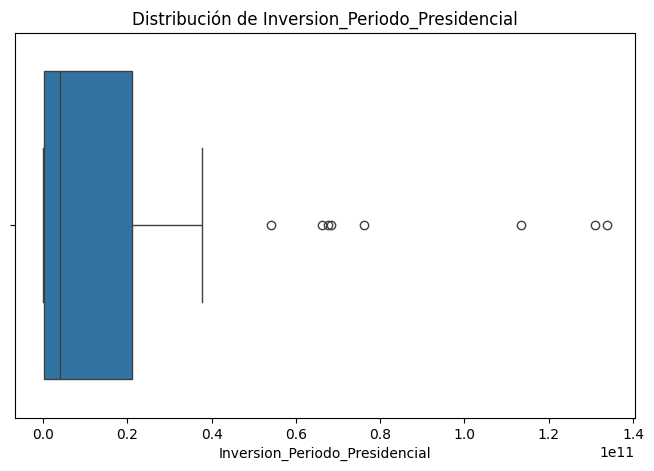

In [100]:
#Verificación de datos Atipicos

plt.figure(figsize=(8,5))
sns.boxplot(x=inversion["Inversion_Periodo_Presidencial"])
plt.title("Distribución de Inversion_Periodo_Presidencial")
plt.show()


In [101]:
Q1 = inversion["Inversion_Periodo_Presidencial"].quantile(0.25)
Q3 = inversion["Inversion_Periodo_Presidencial"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

inversion_limpio = inversion[(inversion["Inversion_Periodo_Presidencial"] >= lower_bound) &
                             (inversion["Inversion_Periodo_Presidencial"] <= upper_bound)]


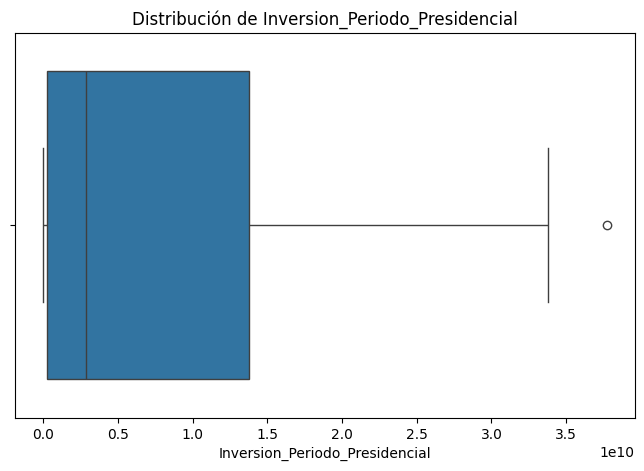

In [102]:
plt.figure(figsize=(8,5))
sns.boxplot(x=inversion_limpio["Inversion_Periodo_Presidencial"])
plt.title("Distribución de Inversion_Periodo_Presidencial")
plt.show()



El dataset de inversión no presentaba valores nulos, por lo que no fue necesario realizar imputaciones. Sin embargo, se verificaron valores atípicos en la variable Inversion_Periodo_Presidencial mediante el método IQR, asegurando que no haya registros que distorsionen el análisis. También se evaluó la inversión per cápita como una posible métrica adicional para futuros análisis.

### **Conjunto de datos `Matriculas`**



**Limpieza de datos**

In [103]:

import numpy as np

# Definir el mapeo de códigos a nombres de departamentos
mapeo_departamentos = {
    5: "Antioquia",
    11: "Bogotá D.C.",
    41: "Huila",
    63: "Quindío"
}

# Reemplazar los valores en la columna "Nombre del Departamento" basados en "Código del Departamento"
matriculas["Nombre del Departamento"] = matriculas["Código delDepartamento"].replace(mapeo_departamentos)

# Verificar si los cambios se aplicaron
print(matriculas.head())



    AÑO  Código delDepartamento Nombre del Departamento  Código delMunicipio  \
0  2016                      11             Bogotá D.C.                11001   
1  2016                      41                   Huila                41001   
2  2016                       5               Antioquia                 5001   
3  2016                       5               Antioquia                 5059   
4  2016                      63                 Quindío                63001   

  Nombre del Municipio  TECNICA PROFESIONAL  TECNOLOGICA  UNIVERSITARIA  \
0          BOGOTÁ D.C.                33441       170898         507209   
1                NEIVA                  402         4903          20785   
2             MEDELLÍN                 2199        74567         156561   
3              ARMENIA                    1           11             89   
4              ARMENIA                 1070         9568          18443   

   ESPECIALIZACION  MAESTRIA  DOCTORADO  IES CON OFERTA  
0         

En general estaba bastante limpio, solo se le realizo el cambio del codigo al nombre del departamento, ya que estaba en la columna codigo departamento y nombre del departamento ambas con codigo y sin el nombre

### **Conjunto de datos `Educación`**


**Limpieza de datos**

In [104]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    "REPITENCIA_TRANSICIÓN", "REPITENCIA_PRIMARIA", "REPITENCIA_MEDIA", "REPITENCIA",
    "TAMAÑO_PROMEDIO_DE_GRUPO", "SEDES_CONECTADAS_A_INTERNET",
    "REPROBACIÓN_MEDIA", "REPROBACIÓN_PRIMARIA", "REPROBACIÓN_TRANSICIÓN", "REPROBACIÓN",
    "APROBACIÓN", "APROBACIÓN_MEDIA", "APROBACIÓN_PRIMARIA", "APROBACIÓN_TRANSICIÓN",
    "DESERCIÓN", "DESERCIÓN_MEDIA", "DESERCIÓN_PRIMARIA", "DESERCIÓN_TRANSICIÓN",
    "COBERTURA_BRUTA_MEDIA", "COBERTURA_BRUTA_PRIMARIA", "COBERTURA_BRUTA_TRANSICIÓN", "COBERTURA_BRUTA",
    "COBERTURA_NETA_MEDIA", "COBERTURA_NETA_PRIMARIA", "COBERTURA_NETA_TRANSICIÓN", "COBERTURA_NETA",
    "CÓDIGO_ETC", "ETC"
]

# Eliminar las columnas
educacion_limpio = educacion.drop(columns=columnas_a_eliminar, errors="ignore")

# Verificar la nueva estructura del dataset
print(educacion_limpio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO                         29 non-null     int64  
 1   CÓDIGO_MUNICIPIO            29 non-null     int64  
 2   MUNICIPIO                   29 non-null     object 
 3   CÓDIGO_DEPARTAMENTO         29 non-null     int64  
 4   DEPARTAMENTO                29 non-null     object 
 5   POBLACIÓN_5_16              29 non-null     float64
 6   TASA_MATRICULACIÓN_5_16     29 non-null     float64
 7   COBERTURA_NETA_SECUNDARIA   29 non-null     float64
 8   COBERTURA_BRUTA_SECUNDARIA  29 non-null     float64
 9   DESERCIÓN_SECUNDARIA        29 non-null     float64
 10  APROBACIÓN_SECUNDARIA       29 non-null     float64
 11  REPROBACIÓN_SECUNDARIA      29 non-null     float64
 12  REPITENCIA_SECUNDARIA       29 non-null     float64
dtypes: float64(8), int64(3), object(2)
me

En general el dataset tenia muchas columna irrelevantes para el proyecto, algunas estas presentaban datos de transision y primaria, lo cual no es relevante. A la vez, presentaba incongruencias es otras columnas que reflejaban datos sin sentido, como el total de estudiantes siendo menor que los estudiantes que cursan en bachillerato. Tambien, hubo columnas con un alto porcentaje de datos nulos. Se eliminaron estas columnas que afectaban el desarrollo del proyecto

### **Conjunto de datos `Internet`**


**Limpieza de datos**

In [105]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   AÑO                           140 non-null    int64 
 1   TRIMESTRE                     140 non-null    int64 
 2   COD_DEPARTAMENTO              140 non-null    int64 
 3   DEPARTAMENTO                  140 non-null    object
 4   COD_MUNICIPIO                 140 non-null    int64 
 5   MUNICIPIO                     140 non-null    object
 6   No. ACCESOS FIJOS A INTERNET  140 non-null    int64 
 7   POBLACIÓN DANE                140 non-null    int64 
 8   INDICE                        140 non-null    object
dtypes: int64(6), object(3)
memory usage: 10.0+ KB


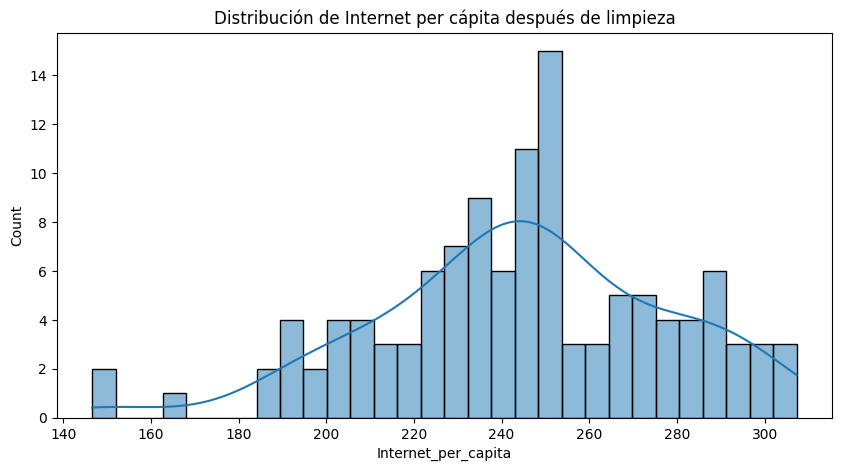

In [106]:
# 1. Creación de métrica de accesos a internet por cada 1000 habitantes
df_internet=internet
df_internet["Internet_per_capita"] = (df_internet["No. ACCESOS FIJOS A INTERNET"] * 1000) / df_internet["POBLACIÓN DANE"]

# 2. Detección y eliminación de valores atípicos en la nueva métrica


Q1 = df_internet["Internet_per_capita"].quantile(0.25)
Q3 = df_internet["Internet_per_capita"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_internet = df_internet[(df_internet["Internet_per_capita"] >= lower_bound) &
                           (df_internet["Internet_per_capita"] <= upper_bound)]

# Visualización de la distribución después de la limpieza
plt.figure(figsize=(10, 5))
sns.histplot(df_internet["Internet_per_capita"], bins=30, kde=True)
plt.title("Distribución de Internet per cápita después de limpieza")
plt.show()

# Guardar el dataset limpio
internet_limpio=df_internet

El dataset de acceso a internet no presentaba valores nulos, por lo que no fue necesario realizar imputaciones. Sin embargo, para mejorar su utilidad en el análisis, se realizaron las siguientes transformaciones:

**Creación de la métrica de acceso a internet per cápita:**

  Para comparar de manera equitativa el acceso a internet entre municipios con diferentes tamaños poblacionales, se creó una nueva variable que calcula los accesos a internet por cada 1,000 habitantes.
  Esta transformación permite un análisis más representativo de la cobertura del servicio en cada municipio.

**Eliminación de valores atípicos:**

Se utilizó el método IQR (Rango Intercuartil) para identificar y eliminar valores extremadamente altos o bajos en la métrica de acceso a internet per cápita.
Esto ayuda a evitar distorsiones en el análisis y a mejorar la representatividad de los datos.

Estas mejoras garantizan que los datos sean más confiables y adecuados para su análisis posterior.